# Finetune your Neural Network and save it

🎯 **Goals of this challenge**
    
1. ⚙️ **Finetune the optimizer** of a neural network
2. 💾 **Save**/**Load** a trained neural network

👩🏻‍🏫 Now that you have solid foundations about what Neural Networks are, how to design their architecture and how to prevent them from overfitting, let's take a closer look at the **`.compile(loss = ..., metrics = ..., activation = ...)`** part.

## (0) The Boston Housing Dataset

📚 ***Tensorflow.Keras*** has several built-in datasets that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

🏠 Among them, we are going to use the **`Boston Housing Dataset`**:
- our mission is to ***predict the values of the houses in USD (thousands)***
- and we will measure the performance of our models using the _Mean Absolute Error (MAE)_ metrics.

In [152]:
# Use this cell to regroup all your imports

## Classic Import
import pandas as pd
#pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from scipy import stats
from time import time

# Widgets import
from ipywidgets import interact
import ipywidgets as widgets
from sklearn.datasets import make_blobs


# SKlearn model Import
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor

#Trees and boosting import 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

#Unsupervised cluster model
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


#Curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Scaler import
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import get_scorer_names

#Pipeline import
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_union
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
import pickle

#Encoding import
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

#Permutation import
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#subtests import
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import max_error

##Times Series import
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA 
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

#Deeplearning import
#import tensorflow.keras
from tensorflow.keras import layers, regularizers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay


#from sklearn import set_config; set_config(display='diagram')


### (0.1) Loading the dataset

In [3]:
# The Boston Housing Dataset from Keras
from tensorflow.keras.datasets import boston_housing

In [4]:
# Loading the dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [5]:
# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

### (0.2) Quick glance at the target

<AxesSubplot:ylabel='Count'>

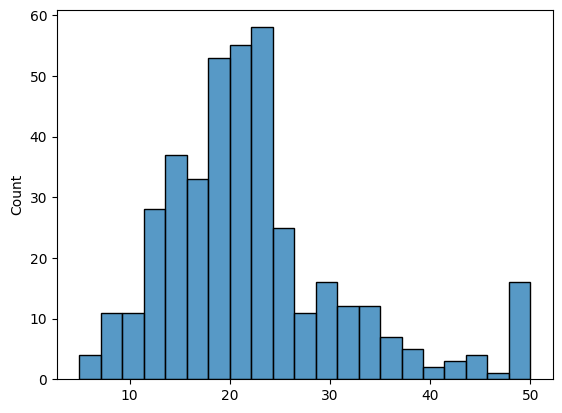

In [6]:
# Distribution of the houses' prices in the training set
sns.histplot(y_train)

In [10]:
X_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [7]:
# Null values and types of each feature:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [8]:
# Statistics about the numerical columns
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### (0.3) Minimal data preprocessing

👉 Here, we don't have any duplicates or missing values. Let's do the strict minimum of data preprocessing, _i.e._ ***scaling** and move on quickly to the modeling phase.

❓ **Question: scaling your features** ❓ 

Standardize `X_train` and `X_test`.

In [13]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### (0.4) Baseline Model


🧑🏻‍🏫 In a regression task, **the baseline model always predicts the average value of `y_train`**

<details>
    <summary><i>Really? </i></summary>
    
* 🐒 Yes in most cases...! we also like to call it _"dumbest model"_ but _"baseline model"_ is more correct politically speaking :)
* ❗️ Be aware that this is not the only possible way of building a baseline model.
* 💹 ***In Time Series, the baseline model consists in predicting the last seen value***

❓ **Question: what would be the performance of the baseline model here ?** ❓ 

Before running any Machine Learning algorithm or advanced Deep Learning Neural Networks, it would be great to establish a benchmark score that you are supposed to beat. Otherwise, what is the point of running a fancy algorithm if you cannot beat this benchmark score on the test set. (other than showing off)? 

* Compute the Mean Absolute Error on the test set using a _dumb prediction_ of the mean value of `y_train` computed on the train set.

In [95]:
reg = DummyRegressor()
reg.fit(X_train_scaled,y_train)
y_pred = reg.predict(X_test_scaled)

abs_err = np.abs(y_test - y_pred)

mean_absolute_error_test_baseline = np.mean(abs_err)
mean_absolute_error_test_baseline

6.533042127742185

## (1) The Neural Network

❓ **Question: initializing a Neural Network with a specific architecture** ❓

Write a function **`initialize_model`** that generates a Neural Network with 3 layers: 
- Input layer: 10 neurons, _"relu"_ activation function, and an the appropriate input dimension
- Hidden layer: 7 neurons and the _"relu"_ activation function
- Predictive layer: an appropriate layer corresponding to the problem we are trying to solve

❓ **Question: number of parameters** ❓

How many parameters do have in this model? 
1. Compute this number yourself
2. Double-check your answer with _model.summary()_

We already covered this question about the **number of parameters in a Fully Connected/Dense network** during **Deep Learning > 01. Fundamentals of Deep Learning** but it is always good to make sure you master the foundations of a new discipline 😉

In [28]:
params = 10*13+10+7*10+7+1*7+1
print("nb of params:",params)
model = initialize_model()
model.summary()

nb of params: 225
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                140       
                                                                 
 dense_19 (Dense)            (None, 7)                 77        
                                                                 
 dense_20 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


<bound method Layer.compute_output_signature of <keras.engine.sequential.Sequential object at 0x7f5da4808fa0>>

<details>
    <summary><i>Answer</i></summary>
    
* Each house has `X_train.shape[-1]` = 13 features
* Remember that a neuron is a linear regression combined with an activation function so we will have 13 weights and 1 bias

1. First layer : 10 neurons $\times$ (13 weights + 1 bias ) = 140 params
2. Second layer : 7 neurons $\times$ (10 weights + 1 bias ) = 77 params
3. Third layer : 1 neuron $\times$ (7 weights + 1 bias) = 8 params
    
    
</details>

## (2) The optimizer



❓ **Question about the compiling method** ❓ 

Write a function that:
* takes _both_ a _model_ and an _optimizer_ as arguments,
* ***compiles*** the model,
* and returns the compiled model.

Please select wisely:
* the _loss function_ to be optimized 
* and  the _metrics_ on which the model should be evaluated.

In [78]:
def compile_model(model, optimizer_name):
    model.compile(optimizer=optimizer_name,loss='mse', metrics=['mae'])
    return model

❓ **Question: evaluating the model** ❓ 

- Initialize the model and compile it with the `adam` optimizer 
- Fit it on the training data. 
- Evaluate your model on the test data.

Don't forget to use an Early Stopping criterion to avoid overfitting 

<details>
    <summary><i>Notes</i></summary>

As we saw in the _"How to prevent overfitting" challenge_,  you could also use L2 penalties and Dropout Layers to prevent overfitting but:
1. _Early Stopping is the easiest and quickest code to implement, you just declare _es = EarlyStopping(...)_ and you call it back in the _.fit()_ _
2. _The main goal of this challenge is to understand the impact of the optimizer_, so stay focused 😉
    
</details>

In [87]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10,restore_best_weights=True )

model = initialize_model()
model = compile_model(model=model,optimizer_name='adam',)

history = model.fit(X_train_scaled, y_train,validation_split=0.3, batch_size=32,epochs=1000,callbacks=[es])

res = model.evaluate(X_test_scaled, y_test)[1]


Epoch 1/1000
9/9 [==============================] - 1s 26ms/step - loss: 557.6956 - mae: 21.8370 - val_loss: 646.6618 - val_mae: 23.1578
Epoch 2/1000
9/9 [==============================] - 0s 8ms/step - loss: 551.5645 - mae: 21.6815 - val_loss: 640.4227 - val_mae: 22.9998
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 545.6959 - mae: 21.5331 - val_loss: 634.2371 - val_mae: 22.8373
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 539.7545 - mae: 21.3715 - val_loss: 628.1564 - val_mae: 22.6776
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 533.7854 - mae: 21.2159 - val_loss: 622.1707 - val_mae: 22.5158
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 528.0928 - mae: 21.0498 - val_loss: 616.1000 - val_mae: 22.3505
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 522.1970 - mae: 20.8839 - val_loss: 609.9622 - val_mae: 22.1806
Epoch 8/1000
9/9 [===========================

9/9 [==============================] - 0s 8ms/step - loss: 31.9787 - mae: 3.9586 - val_loss: 72.5484 - val_mae: 5.4574
Epoch 62/1000
9/9 [==============================] - 0s 8ms/step - loss: 31.1895 - mae: 3.9012 - val_loss: 70.7514 - val_mae: 5.3642
Epoch 63/1000
9/9 [==============================] - 0s 13ms/step - loss: 30.1958 - mae: 3.8375 - val_loss: 69.3302 - val_mae: 5.2838
Epoch 64/1000
9/9 [==============================] - 0s 13ms/step - loss: 29.4786 - mae: 3.7889 - val_loss: 67.7237 - val_mae: 5.1941
Epoch 65/1000
9/9 [==============================] - 0s 8ms/step - loss: 28.6509 - mae: 3.7315 - val_loss: 66.3127 - val_mae: 5.1177
Epoch 66/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.9322 - mae: 3.6803 - val_loss: 64.9388 - val_mae: 5.0412
Epoch 67/1000
9/9 [==============================] - 0s 8ms/step - loss: 27.2311 - mae: 3.6344 - val_loss: 63.5615 - val_mae: 4.9737
Epoch 68/1000
9/9 [==============================] - 0s 15ms/step - loss: 26.6345

9/9 [==============================] - 0s 8ms/step - loss: 13.4542 - mae: 2.5785 - val_loss: 31.7451 - val_mae: 3.3744
Epoch 123/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.3389 - mae: 2.5746 - val_loss: 31.4564 - val_mae: 3.3664
Epoch 124/1000
9/9 [==============================] - 0s 8ms/step - loss: 13.2252 - mae: 2.5653 - val_loss: 31.2116 - val_mae: 3.3495
Epoch 125/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.1376 - mae: 2.5564 - val_loss: 30.9314 - val_mae: 3.3346
Epoch 126/1000
9/9 [==============================] - 0s 8ms/step - loss: 13.0381 - mae: 2.5502 - val_loss: 30.7318 - val_mae: 3.3251
Epoch 127/1000
9/9 [==============================] - 0s 9ms/step - loss: 12.9237 - mae: 2.5390 - val_loss: 30.5058 - val_mae: 3.3113
Epoch 128/1000
9/9 [==============================] - 0s 9ms/step - loss: 12.8440 - mae: 2.5344 - val_loss: 30.1512 - val_mae: 3.2974
Epoch 129/1000
9/9 [==============================] - 0s 9ms/step - loss: 12.

9/9 [==============================] - 0s 9ms/step - loss: 9.4214 - mae: 2.2523 - val_loss: 21.7493 - val_mae: 2.9915
Epoch 184/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.3694 - mae: 2.2468 - val_loss: 21.7093 - val_mae: 2.9838
Epoch 185/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.3361 - mae: 2.2438 - val_loss: 21.5586 - val_mae: 2.9737
Epoch 186/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.3061 - mae: 2.2406 - val_loss: 21.5151 - val_mae: 2.9738
Epoch 187/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.2873 - mae: 2.2392 - val_loss: 21.3940 - val_mae: 2.9821
Epoch 188/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.2424 - mae: 2.2374 - val_loss: 21.2303 - val_mae: 2.9681
Epoch 189/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.1900 - mae: 2.2312 - val_loss: 21.2073 - val_mae: 2.9660
Epoch 190/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.1677 - m

Epoch 245/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.7634 - mae: 2.0667 - val_loss: 18.3748 - val_mae: 2.8457
Epoch 246/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.7309 - mae: 2.0616 - val_loss: 18.3921 - val_mae: 2.8493
Epoch 247/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.6991 - mae: 2.0586 - val_loss: 18.3694 - val_mae: 2.8496
Epoch 248/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.6899 - mae: 2.0575 - val_loss: 18.3625 - val_mae: 2.8550
Epoch 249/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.6770 - mae: 2.0561 - val_loss: 18.3348 - val_mae: 2.8538
Epoch 250/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.6527 - mae: 2.0527 - val_loss: 18.2263 - val_mae: 2.8399
Epoch 251/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.6362 - mae: 2.0519 - val_loss: 18.2314 - val_mae: 2.8423
Epoch 252/1000
9/9 [==============================] - 0s 9ms/step - l

9/9 [==============================] - 0s 9ms/step - loss: 6.8412 - mae: 1.9268 - val_loss: 17.5106 - val_mae: 2.7868
Epoch 307/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8253 - mae: 1.9234 - val_loss: 17.5233 - val_mae: 2.7901
Epoch 308/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8240 - mae: 1.9241 - val_loss: 17.4958 - val_mae: 2.7884
Epoch 309/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8033 - mae: 1.9211 - val_loss: 17.4457 - val_mae: 2.7815
Epoch 310/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8130 - mae: 1.9216 - val_loss: 17.5206 - val_mae: 2.7852
Epoch 311/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.7822 - mae: 1.9156 - val_loss: 17.4681 - val_mae: 2.7843
Epoch 312/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.7633 - mae: 1.9175 - val_loss: 17.4556 - val_mae: 2.7840
Epoch 313/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.7629 - m

In [98]:
res

2.8850555419921875

❓ **Question: a Neural Network vs. a baseline** ❓ 

Compare the MAE on the test best between this Neural Network and the baseline model.

In [96]:
mae_test_baseline = mean_absolute_error_test_baseline
mae_test_neuralnet = res

print(f"The MAE on the test is {mae_test_neuralnet:.4f} for the Neural Network vs. {mae_test_baseline:.4f} for the baseline")

The MAE on the test is 2.8851 for the Neural Network vs. 6.5330 for the baseline


In [ ]:
start = time()
print( 'zadnaodaodazodaz')
print(1+1)

print(time() - start)

In [115]:
es = EarlyStopping(patience=10,restore_best_weights=True )

optimizers = ['adam','adadelta','adagrad','adamax','ftrl','nadam','rmsprop']

duration = []
history = []
scores = []

for opt in optimizers:
    start = time()
    model = initialize_model()
    model = compile_model(model=model,optimizer_name=opt)

    history.append(model.fit(X_train_scaled, y_train,validation_split=0.3, batch_size=32,epochs=1000,callbacks=[es]))
    end = time() - start

    scores.append(model.evaluate(X_test_scaled, y_test)[1])
    duration.append(end)

Epoch 1/1000
9/9 [==============================] - 1s 28ms/step - loss: 526.6122 - mae: 21.1218 - val_loss: 609.0859 - val_mae: 22.4039
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 520.9738 - mae: 20.9769 - val_loss: 602.6826 - val_mae: 22.2503
Epoch 3/1000
9/9 [==============================] - 0s 11ms/step - loss: 514.8567 - mae: 20.8187 - val_loss: 595.4933 - val_mae: 22.0773
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 507.9126 - mae: 20.6392 - val_loss: 587.2859 - val_mae: 21.8830
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 499.8824 - mae: 20.4387 - val_loss: 577.8331 - val_mae: 21.6604
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 490.9221 - mae: 20.2104 - val_loss: 566.4307 - val_mae: 21.4009
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 479.6687 - mae: 19.9451 - val_loss: 553.7843 - val_mae: 21.1095
Epoch 8/1000
9/9 [========================

9/9 [==============================] - 0s 10ms/step - loss: 26.6925 - mae: 3.8012 - val_loss: 50.7829 - val_mae: 5.0221
Epoch 62/1000
9/9 [==============================] - 0s 9ms/step - loss: 26.3032 - mae: 3.7778 - val_loss: 49.9820 - val_mae: 4.9784
Epoch 63/1000
9/9 [==============================] - 0s 9ms/step - loss: 25.9289 - mae: 3.7561 - val_loss: 49.1836 - val_mae: 4.9383
Epoch 64/1000
9/9 [==============================] - 0s 9ms/step - loss: 25.5585 - mae: 3.7312 - val_loss: 48.5659 - val_mae: 4.9056
Epoch 65/1000
9/9 [==============================] - 0s 9ms/step - loss: 25.2282 - mae: 3.7126 - val_loss: 47.9355 - val_mae: 4.8751
Epoch 66/1000
9/9 [==============================] - 0s 8ms/step - loss: 24.9167 - mae: 3.6900 - val_loss: 47.1728 - val_mae: 4.8366
Epoch 67/1000
9/9 [==============================] - 0s 9ms/step - loss: 24.6188 - mae: 3.6719 - val_loss: 46.4424 - val_mae: 4.7978
Epoch 68/1000
9/9 [==============================] - 0s 9ms/step - loss: 24.2721 -

9/9 [==============================] - 0s 10ms/step - loss: 15.7665 - mae: 3.0027 - val_loss: 29.3047 - val_mae: 3.7181
Epoch 123/1000
9/9 [==============================] - 0s 10ms/step - loss: 15.6490 - mae: 2.9943 - val_loss: 29.1230 - val_mae: 3.7066
Epoch 124/1000
9/9 [==============================] - 0s 9ms/step - loss: 15.5564 - mae: 2.9818 - val_loss: 29.0242 - val_mae: 3.6914
Epoch 125/1000
9/9 [==============================] - 0s 10ms/step - loss: 15.4409 - mae: 2.9718 - val_loss: 28.8454 - val_mae: 3.6825
Epoch 126/1000
9/9 [==============================] - 0s 9ms/step - loss: 15.3421 - mae: 2.9629 - val_loss: 28.6975 - val_mae: 3.6729
Epoch 127/1000
9/9 [==============================] - 0s 9ms/step - loss: 15.2406 - mae: 2.9546 - val_loss: 28.5529 - val_mae: 3.6620
Epoch 128/1000
9/9 [==============================] - 0s 10ms/step - loss: 15.1520 - mae: 2.9456 - val_loss: 28.3784 - val_mae: 3.6503
Epoch 129/1000
9/9 [==============================] - 0s 9ms/step - loss:

9/9 [==============================] - 0s 9ms/step - loss: 10.8981 - mae: 2.4807 - val_loss: 23.0213 - val_mae: 3.3290
Epoch 184/1000
9/9 [==============================] - 0s 10ms/step - loss: 10.8365 - mae: 2.4739 - val_loss: 22.9470 - val_mae: 3.3219
Epoch 185/1000
9/9 [==============================] - 0s 9ms/step - loss: 10.7772 - mae: 2.4665 - val_loss: 22.8623 - val_mae: 3.3149
Epoch 186/1000
9/9 [==============================] - 0s 10ms/step - loss: 10.7212 - mae: 2.4614 - val_loss: 22.7839 - val_mae: 3.3117
Epoch 187/1000
9/9 [==============================] - 0s 10ms/step - loss: 10.6795 - mae: 2.4603 - val_loss: 22.6771 - val_mae: 3.3052
Epoch 188/1000
9/9 [==============================] - 0s 9ms/step - loss: 10.6135 - mae: 2.4515 - val_loss: 22.6185 - val_mae: 3.2975
Epoch 189/1000
9/9 [==============================] - 0s 9ms/step - loss: 10.5660 - mae: 2.4444 - val_loss: 22.5745 - val_mae: 3.2927
Epoch 190/1000
9/9 [==============================] - 0s 10ms/step - loss:

9/9 [==============================] - 0s 12ms/step - loss: 8.8032 - mae: 2.2247 - val_loss: 19.6349 - val_mae: 3.0347
Epoch 245/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.7817 - mae: 2.2257 - val_loss: 19.6178 - val_mae: 3.0346
Epoch 246/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.7657 - mae: 2.2242 - val_loss: 19.6180 - val_mae: 3.0310
Epoch 247/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.7455 - mae: 2.2203 - val_loss: 19.5517 - val_mae: 3.0259
Epoch 248/1000
9/9 [==============================] - 0s 15ms/step - loss: 8.7145 - mae: 2.2134 - val_loss: 19.5594 - val_mae: 3.0272
Epoch 249/1000
9/9 [==============================] - 0s 13ms/step - loss: 8.6928 - mae: 2.2082 - val_loss: 19.5064 - val_mae: 3.0219
Epoch 250/1000
9/9 [==============================] - 0s 11ms/step - loss: 8.6785 - mae: 2.2087 - val_loss: 19.4410 - val_mae: 3.0119
Epoch 251/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.65

9/9 [==============================] - 0s 9ms/step - loss: 7.6701 - mae: 2.0619 - val_loss: 18.0147 - val_mae: 2.8535
Epoch 306/1000
9/9 [==============================] - 0s 16ms/step - loss: 7.6604 - mae: 2.0595 - val_loss: 17.9840 - val_mae: 2.8466
Epoch 307/1000
9/9 [==============================] - 0s 12ms/step - loss: 7.6448 - mae: 2.0521 - val_loss: 17.9978 - val_mae: 2.8467
Epoch 308/1000
9/9 [==============================] - 0s 10ms/step - loss: 7.6409 - mae: 2.0543 - val_loss: 17.9460 - val_mae: 2.8434
Epoch 309/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.6207 - mae: 2.0579 - val_loss: 17.9032 - val_mae: 2.8367
Epoch 310/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.6020 - mae: 2.0519 - val_loss: 17.8972 - val_mae: 2.8361
Epoch 311/1000
9/9 [==============================] - 0s 10ms/step - loss: 7.5900 - mae: 2.0441 - val_loss: 17.8564 - val_mae: 2.8314
Epoch 312/1000
9/9 [==============================] - 0s 10ms/step - loss: 7.556

9/9 [==============================] - 0s 9ms/step - loss: 6.8078 - mae: 1.9204 - val_loss: 16.9636 - val_mae: 2.7139
Epoch 367/1000
9/9 [==============================] - 0s 13ms/step - loss: 6.7916 - mae: 1.9147 - val_loss: 16.9503 - val_mae: 2.7086
Epoch 368/1000
9/9 [==============================] - 0s 12ms/step - loss: 6.7769 - mae: 1.9126 - val_loss: 16.9610 - val_mae: 2.7100
Epoch 369/1000
9/9 [==============================] - 0s 10ms/step - loss: 6.7820 - mae: 1.9114 - val_loss: 16.9689 - val_mae: 2.7111
Epoch 370/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.7649 - mae: 1.9116 - val_loss: 16.9659 - val_mae: 2.7058
Epoch 371/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.7781 - mae: 1.9145 - val_loss: 16.9095 - val_mae: 2.7008
Epoch 372/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.7637 - mae: 1.9126 - val_loss: 16.9540 - val_mae: 2.7026
Epoch 373/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.7388 

9/9 [==============================] - 0s 9ms/step - loss: 6.2256 - mae: 1.8273 - val_loss: 16.2177 - val_mae: 2.6192
Epoch 428/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1897 - mae: 1.8243 - val_loss: 16.2691 - val_mae: 2.6215
Epoch 429/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.1518 - mae: 1.8167 - val_loss: 16.2713 - val_mae: 2.6178
Epoch 430/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1594 - mae: 1.8163 - val_loss: 16.2493 - val_mae: 2.6178
Epoch 431/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1365 - mae: 1.8133 - val_loss: 16.1806 - val_mae: 2.6160
Epoch 432/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1284 - mae: 1.8141 - val_loss: 16.1501 - val_mae: 2.6110
Epoch 433/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1194 - mae: 1.8106 - val_loss: 16.1585 - val_mae: 2.6082
Epoch 434/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1231 - m

Epoch 489/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.6897 - mae: 1.7461 - val_loss: 15.6976 - val_mae: 2.5763
Epoch 490/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.6881 - mae: 1.7437 - val_loss: 15.6874 - val_mae: 2.5766
Epoch 491/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.6763 - mae: 1.7446 - val_loss: 15.6449 - val_mae: 2.5733
Epoch 492/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.6597 - mae: 1.7460 - val_loss: 15.6239 - val_mae: 2.5691
Epoch 493/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.6522 - mae: 1.7408 - val_loss: 15.6471 - val_mae: 2.5716
Epoch 494/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.6893 - mae: 1.7442 - val_loss: 15.6998 - val_mae: 2.5701
Epoch 495/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.6342 - mae: 1.7393 - val_loss: 15.6340 - val_mae: 2.5669
Epoch 496/1000
9/9 [==============================] - 0s 9ms/step - l

9/9 [==============================] - 0s 9ms/step - loss: 5.1914 - mae: 1.6870 - val_loss: 14.9942 - val_mae: 2.5080
Epoch 551/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.2019 - mae: 1.6788 - val_loss: 15.0877 - val_mae: 2.5102
Epoch 552/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.1377 - mae: 1.6693 - val_loss: 15.0022 - val_mae: 2.5039
Epoch 553/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.1428 - mae: 1.6789 - val_loss: 14.9564 - val_mae: 2.4978
Epoch 554/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.1495 - mae: 1.6813 - val_loss: 14.9803 - val_mae: 2.4984
Epoch 555/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.1343 - mae: 1.6779 - val_loss: 14.9954 - val_mae: 2.5024
Epoch 556/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.1101 - mae: 1.6709 - val_loss: 15.0179 - val_mae: 2.5069
Epoch 557/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.1429 - m

9/9 [==============================] - 0s 11ms/step - loss: 4.7853 - mae: 1.6355 - val_loss: 14.4790 - val_mae: 2.4555
Epoch 612/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.7929 - mae: 1.6377 - val_loss: 14.5083 - val_mae: 2.4574
Epoch 613/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.7892 - mae: 1.6337 - val_loss: 14.5129 - val_mae: 2.4654
Epoch 614/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.8207 - mae: 1.6385 - val_loss: 14.5262 - val_mae: 2.4602
Epoch 615/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.7801 - mae: 1.6338 - val_loss: 14.4596 - val_mae: 2.4564
Epoch 616/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.7651 - mae: 1.6353 - val_loss: 14.3991 - val_mae: 2.4531
Epoch 617/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.7525 - mae: 1.6329 - val_loss: 14.4502 - val_mae: 2.4540
Epoch 618/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.7580

9/9 [==============================] - 0s 10ms/step - loss: 4.5117 - mae: 1.5957 - val_loss: 14.0819 - val_mae: 2.4291
Epoch 673/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.5110 - mae: 1.5902 - val_loss: 14.1039 - val_mae: 2.4329
Epoch 674/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.5082 - mae: 1.5874 - val_loss: 14.0723 - val_mae: 2.4353
Epoch 675/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.5058 - mae: 1.5882 - val_loss: 14.0380 - val_mae: 2.4273
Epoch 676/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.5031 - mae: 1.5844 - val_loss: 14.1328 - val_mae: 2.4297
Epoch 677/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.5036 - mae: 1.5882 - val_loss: 14.0738 - val_mae: 2.4378
Epoch 678/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.4833 - mae: 1.5868 - val_loss: 14.0853 - val_mae: 2.4384
Epoch 679/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.4

9/9 [==============================] - 0s 15ms/step - loss: 4.3512 - mae: 1.5639 - val_loss: 13.8037 - val_mae: 2.4162
Epoch 734/1000
9/9 [==============================] - 0s 12ms/step - loss: 4.3298 - mae: 1.5635 - val_loss: 13.7678 - val_mae: 2.4095
Epoch 735/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.3506 - mae: 1.5716 - val_loss: 13.6260 - val_mae: 2.3946
Epoch 736/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.3292 - mae: 1.5652 - val_loss: 13.6703 - val_mae: 2.3976
Epoch 737/1000
9/9 [==============================] - 0s 10ms/step - loss: 4.3161 - mae: 1.5580 - val_loss: 13.7747 - val_mae: 2.4086
Epoch 738/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.3173 - mae: 1.5575 - val_loss: 13.7247 - val_mae: 2.4069
Epoch 739/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.3261 - mae: 1.5598 - val_loss: 13.6602 - val_mae: 2.4000
Epoch 740/1000
9/9 [==============================] - 0s 9ms/step - loss: 4.3191

Epoch 41/1000
9/9 [==============================] - 0s 9ms/step - loss: 580.2789 - mae: 22.4353 - val_loss: 672.8997 - val_mae: 23.8081
Epoch 42/1000
9/9 [==============================] - 0s 9ms/step - loss: 580.2675 - mae: 22.4351 - val_loss: 672.8883 - val_mae: 23.8079
Epoch 43/1000
9/9 [==============================] - 0s 9ms/step - loss: 580.2561 - mae: 22.4348 - val_loss: 672.8770 - val_mae: 23.8076
Epoch 44/1000
9/9 [==============================] - 0s 9ms/step - loss: 580.2446 - mae: 22.4346 - val_loss: 672.8655 - val_mae: 23.8074
Epoch 45/1000
9/9 [==============================] - 0s 9ms/step - loss: 580.2331 - mae: 22.4344 - val_loss: 672.8540 - val_mae: 23.8072
Epoch 46/1000
9/9 [==============================] - 0s 9ms/step - loss: 580.2215 - mae: 22.4342 - val_loss: 672.8425 - val_mae: 23.8070
Epoch 47/1000
9/9 [==============================] - 0s 8ms/step - loss: 580.2100 - mae: 22.4339 - val_loss: 672.8309 - val_mae: 23.8068
Epoch 48/1000
9/9 [======================

9/9 [==============================] - 0s 9ms/step - loss: 579.5417 - mae: 22.4210 - val_loss: 672.1649 - val_mae: 23.7944
Epoch 101/1000
9/9 [==============================] - 0s 9ms/step - loss: 579.5282 - mae: 22.4207 - val_loss: 672.1514 - val_mae: 23.7942
Epoch 102/1000
9/9 [==============================] - 0s 9ms/step - loss: 579.5147 - mae: 22.4204 - val_loss: 672.1379 - val_mae: 23.7939
Epoch 103/1000
9/9 [==============================] - 0s 10ms/step - loss: 579.5012 - mae: 22.4202 - val_loss: 672.1245 - val_mae: 23.7937
Epoch 104/1000
9/9 [==============================] - 0s 10ms/step - loss: 579.4875 - mae: 22.4199 - val_loss: 672.1109 - val_mae: 23.7934
Epoch 105/1000
9/9 [==============================] - 0s 9ms/step - loss: 579.4739 - mae: 22.4196 - val_loss: 672.0973 - val_mae: 23.7932
Epoch 106/1000
9/9 [==============================] - 0s 9ms/step - loss: 579.4603 - mae: 22.4194 - val_loss: 672.0837 - val_mae: 23.7929
Epoch 107/1000
9/9 [===========================

9/9 [==============================] - 0s 9ms/step - loss: 578.7054 - mae: 22.4047 - val_loss: 671.3307 - val_mae: 23.7789
Epoch 160/1000
9/9 [==============================] - 0s 10ms/step - loss: 578.6906 - mae: 22.4044 - val_loss: 671.3159 - val_mae: 23.7786
Epoch 161/1000
9/9 [==============================] - 0s 13ms/step - loss: 578.6758 - mae: 22.4041 - val_loss: 671.3011 - val_mae: 23.7783
Epoch 162/1000
9/9 [==============================] - 0s 11ms/step - loss: 578.6610 - mae: 22.4038 - val_loss: 671.2865 - val_mae: 23.7781
Epoch 163/1000
9/9 [==============================] - 0s 9ms/step - loss: 578.6462 - mae: 22.4035 - val_loss: 671.2716 - val_mae: 23.7778
Epoch 164/1000
9/9 [==============================] - 0s 9ms/step - loss: 578.6313 - mae: 22.4032 - val_loss: 671.2568 - val_mae: 23.7775
Epoch 165/1000
9/9 [==============================] - 0s 9ms/step - loss: 578.6166 - mae: 22.4029 - val_loss: 671.2419 - val_mae: 23.7772
Epoch 166/1000
9/9 [==========================

9/9 [==============================] - 0s 12ms/step - loss: 577.8105 - mae: 22.3872 - val_loss: 670.4377 - val_mae: 23.7622
Epoch 219/1000
9/9 [==============================] - 0s 14ms/step - loss: 577.7948 - mae: 22.3869 - val_loss: 670.4222 - val_mae: 23.7619
Epoch 220/1000
9/9 [==============================] - 0s 12ms/step - loss: 577.7791 - mae: 22.3866 - val_loss: 670.4065 - val_mae: 23.7617
Epoch 221/1000
9/9 [==============================] - 0s 9ms/step - loss: 577.7634 - mae: 22.3863 - val_loss: 670.3908 - val_mae: 23.7614
Epoch 222/1000
9/9 [==============================] - 0s 9ms/step - loss: 577.7476 - mae: 22.3860 - val_loss: 670.3751 - val_mae: 23.7611
Epoch 223/1000
9/9 [==============================] - 0s 9ms/step - loss: 577.7319 - mae: 22.3857 - val_loss: 670.3595 - val_mae: 23.7608
Epoch 224/1000
9/9 [==============================] - 0s 8ms/step - loss: 577.7162 - mae: 22.3853 - val_loss: 670.3438 - val_mae: 23.7605
Epoch 225/1000
9/9 [==========================

9/9 [==============================] - 0s 9ms/step - loss: 576.8734 - mae: 22.3688 - val_loss: 669.5026 - val_mae: 23.7448
Epoch 278/1000
9/9 [==============================] - 0s 9ms/step - loss: 576.8574 - mae: 22.3685 - val_loss: 669.4867 - val_mae: 23.7445
Epoch 279/1000
9/9 [==============================] - 0s 9ms/step - loss: 576.8415 - mae: 22.3682 - val_loss: 669.4706 - val_mae: 23.7442
Epoch 280/1000
9/9 [==============================] - 0s 9ms/step - loss: 576.8254 - mae: 22.3679 - val_loss: 669.4547 - val_mae: 23.7439
Epoch 281/1000
9/9 [==============================] - 0s 8ms/step - loss: 576.8094 - mae: 22.3675 - val_loss: 669.4390 - val_mae: 23.7436
Epoch 282/1000
9/9 [==============================] - 0s 8ms/step - loss: 576.7935 - mae: 22.3672 - val_loss: 669.4231 - val_mae: 23.7433
Epoch 283/1000
9/9 [==============================] - 0s 9ms/step - loss: 576.7774 - mae: 22.3669 - val_loss: 669.4072 - val_mae: 23.7430
Epoch 284/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 575.9245 - mae: 22.3501 - val_loss: 668.5641 - val_mae: 23.7271
Epoch 337/1000
9/9 [==============================] - 0s 9ms/step - loss: 575.9083 - mae: 22.3498 - val_loss: 668.5482 - val_mae: 23.7268
Epoch 338/1000
9/9 [==============================] - 0s 9ms/step - loss: 575.8921 - mae: 22.3494 - val_loss: 668.5321 - val_mae: 23.7265
Epoch 339/1000
9/9 [==============================] - 0s 9ms/step - loss: 575.8759 - mae: 22.3491 - val_loss: 668.5161 - val_mae: 23.7262
Epoch 340/1000
9/9 [==============================] - 0s 9ms/step - loss: 575.8596 - mae: 22.3488 - val_loss: 668.5000 - val_mae: 23.7258
Epoch 341/1000
9/9 [==============================] - 0s 8ms/step - loss: 575.8433 - mae: 22.3485 - val_loss: 668.4839 - val_mae: 23.7255
Epoch 342/1000
9/9 [==============================] - 0s 9ms/step - loss: 575.8270 - mae: 22.3482 - val_loss: 668.4678 - val_mae: 23.7252
Epoch 343/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 574.9587 - mae: 22.3310 - val_loss: 667.6080 - val_mae: 23.7090
Epoch 396/1000
9/9 [==============================] - 0s 9ms/step - loss: 574.9421 - mae: 22.3307 - val_loss: 667.5917 - val_mae: 23.7087
Epoch 397/1000
9/9 [==============================] - 0s 9ms/step - loss: 574.9256 - mae: 22.3303 - val_loss: 667.5754 - val_mae: 23.7083
Epoch 398/1000
9/9 [==============================] - 0s 8ms/step - loss: 574.9091 - mae: 22.3300 - val_loss: 667.5590 - val_mae: 23.7080
Epoch 399/1000
9/9 [==============================] - 0s 9ms/step - loss: 574.8926 - mae: 22.3297 - val_loss: 667.5427 - val_mae: 23.7077
Epoch 400/1000
9/9 [==============================] - 0s 9ms/step - loss: 574.8761 - mae: 22.3293 - val_loss: 667.5263 - val_mae: 23.7074
Epoch 401/1000
9/9 [==============================] - 0s 9ms/step - loss: 574.8597 - mae: 22.3290 - val_loss: 667.5099 - val_mae: 23.7071
Epoch 402/1000
9/9 [=============================

9/9 [==============================] - 0s 12ms/step - loss: 573.9728 - mae: 22.3115 - val_loss: 666.6337 - val_mae: 23.6905
Epoch 455/1000
9/9 [==============================] - 0s 16ms/step - loss: 573.9559 - mae: 22.3111 - val_loss: 666.6170 - val_mae: 23.6902
Epoch 456/1000
9/9 [==============================] - 0s 11ms/step - loss: 573.9388 - mae: 22.3108 - val_loss: 666.6003 - val_mae: 23.6899
Epoch 457/1000
9/9 [==============================] - 0s 8ms/step - loss: 573.9220 - mae: 22.3105 - val_loss: 666.5836 - val_mae: 23.6895
Epoch 458/1000
9/9 [==============================] - 0s 9ms/step - loss: 573.9050 - mae: 22.3101 - val_loss: 666.5668 - val_mae: 23.6892
Epoch 459/1000
9/9 [==============================] - 0s 9ms/step - loss: 573.8879 - mae: 22.3098 - val_loss: 666.5502 - val_mae: 23.6889
Epoch 460/1000
9/9 [==============================] - 0s 12ms/step - loss: 573.8711 - mae: 22.3094 - val_loss: 666.5334 - val_mae: 23.6886
Epoch 461/1000
9/9 [=========================

9/9 [==============================] - 0s 8ms/step - loss: 572.9727 - mae: 22.2916 - val_loss: 665.6487 - val_mae: 23.6718
Epoch 514/1000
9/9 [==============================] - 0s 8ms/step - loss: 572.9559 - mae: 22.2913 - val_loss: 665.6320 - val_mae: 23.6715
Epoch 515/1000
9/9 [==============================] - 0s 10ms/step - loss: 572.9389 - mae: 22.2909 - val_loss: 665.6154 - val_mae: 23.6711
Epoch 516/1000
9/9 [==============================] - 0s 14ms/step - loss: 572.9220 - mae: 22.2906 - val_loss: 665.5986 - val_mae: 23.6708
Epoch 517/1000
9/9 [==============================] - 0s 14ms/step - loss: 572.9051 - mae: 22.2903 - val_loss: 665.5820 - val_mae: 23.6705
Epoch 518/1000
9/9 [==============================] - 0s 11ms/step - loss: 572.8882 - mae: 22.2899 - val_loss: 665.5652 - val_mae: 23.6702
Epoch 519/1000
9/9 [==============================] - 0s 9ms/step - loss: 572.8711 - mae: 22.2896 - val_loss: 665.5485 - val_mae: 23.6699
Epoch 520/1000
9/9 [=========================

9/9 [==============================] - 0s 8ms/step - loss: 571.9796 - mae: 22.2718 - val_loss: 664.6730 - val_mae: 23.6532
Epoch 573/1000
9/9 [==============================] - 0s 7ms/step - loss: 571.9629 - mae: 22.2715 - val_loss: 664.6566 - val_mae: 23.6529
Epoch 574/1000
9/9 [==============================] - 0s 8ms/step - loss: 571.9462 - mae: 22.2711 - val_loss: 664.6403 - val_mae: 23.6526
Epoch 575/1000
9/9 [==============================] - 0s 8ms/step - loss: 571.9294 - mae: 22.2708 - val_loss: 664.6238 - val_mae: 23.6523
Epoch 576/1000
9/9 [==============================] - 0s 7ms/step - loss: 571.9127 - mae: 22.2705 - val_loss: 664.6074 - val_mae: 23.6519
Epoch 577/1000
9/9 [==============================] - 0s 9ms/step - loss: 571.8961 - mae: 22.2701 - val_loss: 664.5911 - val_mae: 23.6516
Epoch 578/1000
9/9 [==============================] - 0s 8ms/step - loss: 571.8795 - mae: 22.2698 - val_loss: 664.5748 - val_mae: 23.6513
Epoch 579/1000
9/9 [=============================

9/9 [==============================] - 0s 8ms/step - loss: 570.9955 - mae: 22.2521 - val_loss: 663.7091 - val_mae: 23.6348
Epoch 632/1000
9/9 [==============================] - 0s 8ms/step - loss: 570.9790 - mae: 22.2518 - val_loss: 663.6929 - val_mae: 23.6345
Epoch 633/1000
9/9 [==============================] - 0s 8ms/step - loss: 570.9624 - mae: 22.2515 - val_loss: 663.6766 - val_mae: 23.6342
Epoch 634/1000
9/9 [==============================] - 0s 8ms/step - loss: 570.9457 - mae: 22.2511 - val_loss: 663.6603 - val_mae: 23.6339
Epoch 635/1000
9/9 [==============================] - 0s 7ms/step - loss: 570.9292 - mae: 22.2508 - val_loss: 663.6442 - val_mae: 23.6336
Epoch 636/1000
9/9 [==============================] - 0s 7ms/step - loss: 570.9126 - mae: 22.2505 - val_loss: 663.6278 - val_mae: 23.6333
Epoch 637/1000
9/9 [==============================] - 0s 8ms/step - loss: 570.8959 - mae: 22.2501 - val_loss: 663.6115 - val_mae: 23.6329
Epoch 638/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 570.0118 - mae: 22.2324 - val_loss: 662.7484 - val_mae: 23.6164
Epoch 691/1000
9/9 [==============================] - 0s 9ms/step - loss: 569.9952 - mae: 22.2321 - val_loss: 662.7321 - val_mae: 23.6161
Epoch 692/1000
9/9 [==============================] - 0s 9ms/step - loss: 569.9785 - mae: 22.2317 - val_loss: 662.7159 - val_mae: 23.6158
Epoch 693/1000
9/9 [==============================] - 0s 9ms/step - loss: 569.9619 - mae: 22.2314 - val_loss: 662.6996 - val_mae: 23.6155
Epoch 694/1000
9/9 [==============================] - 0s 9ms/step - loss: 569.9453 - mae: 22.2311 - val_loss: 662.6833 - val_mae: 23.6152
Epoch 695/1000
9/9 [==============================] - 0s 8ms/step - loss: 569.9285 - mae: 22.2307 - val_loss: 662.6669 - val_mae: 23.6149
Epoch 696/1000
9/9 [==============================] - 0s 9ms/step - loss: 569.9119 - mae: 22.2304 - val_loss: 662.6507 - val_mae: 23.6145
Epoch 697/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 569.0266 - mae: 22.2126 - val_loss: 661.7837 - val_mae: 23.5979
Epoch 750/1000
9/9 [==============================] - 0s 9ms/step - loss: 569.0099 - mae: 22.2123 - val_loss: 661.7674 - val_mae: 23.5976
Epoch 751/1000
9/9 [==============================] - 0s 9ms/step - loss: 568.9932 - mae: 22.2119 - val_loss: 661.7511 - val_mae: 23.5973
Epoch 752/1000
9/9 [==============================] - 0s 9ms/step - loss: 568.9765 - mae: 22.2116 - val_loss: 661.7348 - val_mae: 23.5970
Epoch 753/1000
9/9 [==============================] - 0s 9ms/step - loss: 568.9598 - mae: 22.2113 - val_loss: 661.7184 - val_mae: 23.5967
Epoch 754/1000
9/9 [==============================] - 0s 9ms/step - loss: 568.9431 - mae: 22.2109 - val_loss: 661.7020 - val_mae: 23.5964
Epoch 755/1000
9/9 [==============================] - 0s 8ms/step - loss: 568.9264 - mae: 22.2106 - val_loss: 661.6858 - val_mae: 23.5960
Epoch 756/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 568.0464 - mae: 22.1929 - val_loss: 660.8242 - val_mae: 23.5795
Epoch 809/1000
9/9 [==============================] - 0s 9ms/step - loss: 568.0298 - mae: 22.1926 - val_loss: 660.8082 - val_mae: 23.5792
Epoch 810/1000
9/9 [==============================] - 0s 9ms/step - loss: 568.0133 - mae: 22.1922 - val_loss: 660.7921 - val_mae: 23.5789
Epoch 811/1000
9/9 [==============================] - 0s 8ms/step - loss: 567.9967 - mae: 22.1919 - val_loss: 660.7759 - val_mae: 23.5785
Epoch 812/1000
9/9 [==============================] - 0s 9ms/step - loss: 567.9802 - mae: 22.1915 - val_loss: 660.7596 - val_mae: 23.5782
Epoch 813/1000
9/9 [==============================] - 0s 9ms/step - loss: 567.9635 - mae: 22.1912 - val_loss: 660.7436 - val_mae: 23.5779
Epoch 814/1000
9/9 [==============================] - 0s 9ms/step - loss: 567.9470 - mae: 22.1909 - val_loss: 660.7274 - val_mae: 23.5776
Epoch 815/1000
9/9 [=============================

9/9 [==============================] - 0s 13ms/step - loss: 567.0726 - mae: 22.1732 - val_loss: 659.8774 - val_mae: 23.5612
Epoch 868/1000
9/9 [==============================] - 0s 18ms/step - loss: 567.0562 - mae: 22.1729 - val_loss: 659.8613 - val_mae: 23.5609
Epoch 869/1000
9/9 [==============================] - 0s 14ms/step - loss: 567.0397 - mae: 22.1726 - val_loss: 659.8453 - val_mae: 23.5606
Epoch 870/1000
9/9 [==============================] - 0s 17ms/step - loss: 567.0231 - mae: 22.1722 - val_loss: 659.8292 - val_mae: 23.5603
Epoch 871/1000
9/9 [==============================] - 0s 20ms/step - loss: 567.0065 - mae: 22.1719 - val_loss: 659.8131 - val_mae: 23.5600
Epoch 872/1000
9/9 [==============================] - 0s 17ms/step - loss: 566.9901 - mae: 22.1716 - val_loss: 659.7972 - val_mae: 23.5597
Epoch 873/1000
9/9 [==============================] - 0s 9ms/step - loss: 566.9736 - mae: 22.1712 - val_loss: 659.7812 - val_mae: 23.5594
Epoch 874/1000
9/9 [=======================

9/9 [==============================] - 0s 9ms/step - loss: 566.1009 - mae: 22.1536 - val_loss: 658.9302 - val_mae: 23.5430
Epoch 927/1000
9/9 [==============================] - 0s 9ms/step - loss: 566.0844 - mae: 22.1533 - val_loss: 658.9141 - val_mae: 23.5427
Epoch 928/1000
9/9 [==============================] - 0s 9ms/step - loss: 566.0678 - mae: 22.1529 - val_loss: 658.8980 - val_mae: 23.5424
Epoch 929/1000
9/9 [==============================] - 0s 9ms/step - loss: 566.0513 - mae: 22.1526 - val_loss: 658.8818 - val_mae: 23.5421
Epoch 930/1000
9/9 [==============================] - 0s 8ms/step - loss: 566.0349 - mae: 22.1523 - val_loss: 658.8657 - val_mae: 23.5418
Epoch 931/1000
9/9 [==============================] - 0s 8ms/step - loss: 566.0183 - mae: 22.1519 - val_loss: 658.8495 - val_mae: 23.5414
Epoch 932/1000
9/9 [==============================] - 0s 8ms/step - loss: 566.0016 - mae: 22.1516 - val_loss: 658.8333 - val_mae: 23.5411
Epoch 933/1000
9/9 [=============================

9/9 [==============================] - 0s 7ms/step - loss: 565.1417 - mae: 22.1342 - val_loss: 657.9896 - val_mae: 23.5249
Epoch 986/1000
9/9 [==============================] - 0s 7ms/step - loss: 565.1258 - mae: 22.1339 - val_loss: 657.9740 - val_mae: 23.5245
Epoch 987/1000
9/9 [==============================] - 0s 8ms/step - loss: 565.1098 - mae: 22.1336 - val_loss: 657.9583 - val_mae: 23.5242
Epoch 988/1000
9/9 [==============================] - 0s 8ms/step - loss: 565.0936 - mae: 22.1332 - val_loss: 657.9424 - val_mae: 23.5239
Epoch 989/1000
9/9 [==============================] - 0s 7ms/step - loss: 565.0776 - mae: 22.1329 - val_loss: 657.9264 - val_mae: 23.5236
Epoch 990/1000
9/9 [==============================] - 0s 8ms/step - loss: 565.0616 - mae: 22.1326 - val_loss: 657.9106 - val_mae: 23.5233
Epoch 991/1000
9/9 [==============================] - 0s 8ms/step - loss: 565.0456 - mae: 22.1323 - val_loss: 657.8949 - val_mae: 23.5230
Epoch 992/1000
9/9 [=============================

9/9 [==============================] - 0s 7ms/step - loss: 506.2170 - mae: 20.7134 - val_loss: 588.3531 - val_mae: 22.1025
Epoch 45/1000
9/9 [==============================] - 0s 7ms/step - loss: 505.7997 - mae: 20.7040 - val_loss: 587.8764 - val_mae: 22.0926
Epoch 46/1000
9/9 [==============================] - 0s 7ms/step - loss: 505.3810 - mae: 20.6944 - val_loss: 587.4011 - val_mae: 22.0826
Epoch 47/1000
9/9 [==============================] - 0s 7ms/step - loss: 504.9688 - mae: 20.6849 - val_loss: 586.9265 - val_mae: 22.0728
Epoch 48/1000
9/9 [==============================] - 0s 7ms/step - loss: 504.5588 - mae: 20.6757 - val_loss: 586.4542 - val_mae: 22.0629
Epoch 49/1000
9/9 [==============================] - 0s 7ms/step - loss: 504.1498 - mae: 20.6664 - val_loss: 585.9845 - val_mae: 22.0532
Epoch 50/1000
9/9 [==============================] - 0s 7ms/step - loss: 503.7451 - mae: 20.6571 - val_loss: 585.5201 - val_mae: 22.0435
Epoch 51/1000
9/9 [==============================] - 0s

Epoch 104/1000
9/9 [==============================] - 0s 9ms/step - loss: 483.6959 - mae: 20.2065 - val_loss: 563.2778 - val_mae: 21.5793
Epoch 105/1000
9/9 [==============================] - 0s 8ms/step - loss: 483.3384 - mae: 20.1986 - val_loss: 562.8882 - val_mae: 21.5713
Epoch 106/1000
9/9 [==============================] - 0s 8ms/step - loss: 482.9774 - mae: 20.1907 - val_loss: 562.5009 - val_mae: 21.5632
Epoch 107/1000
9/9 [==============================] - 0s 9ms/step - loss: 482.6194 - mae: 20.1828 - val_loss: 562.1134 - val_mae: 21.5551
Epoch 108/1000
9/9 [==============================] - 0s 9ms/step - loss: 482.2613 - mae: 20.1749 - val_loss: 561.7277 - val_mae: 21.5470
Epoch 109/1000
9/9 [==============================] - 0s 9ms/step - loss: 481.9051 - mae: 20.1671 - val_loss: 561.3416 - val_mae: 21.5390
Epoch 110/1000
9/9 [==============================] - 0s 9ms/step - loss: 481.5480 - mae: 20.1591 - val_loss: 560.9557 - val_mae: 21.5309
Epoch 111/1000
9/9 [==============

9/9 [==============================] - 0s 9ms/step - loss: 462.9243 - mae: 19.7484 - val_loss: 540.9230 - val_mae: 21.1122
Epoch 164/1000
9/9 [==============================] - 0s 9ms/step - loss: 462.5816 - mae: 19.7409 - val_loss: 540.5536 - val_mae: 21.1045
Epoch 165/1000
9/9 [==============================] - 0s 9ms/step - loss: 462.2385 - mae: 19.7334 - val_loss: 540.1883 - val_mae: 21.0968
Epoch 166/1000
9/9 [==============================] - 0s 9ms/step - loss: 461.8988 - mae: 19.7257 - val_loss: 539.8222 - val_mae: 21.0891
Epoch 167/1000
9/9 [==============================] - 0s 9ms/step - loss: 461.5576 - mae: 19.7182 - val_loss: 539.4557 - val_mae: 21.0814
Epoch 168/1000
9/9 [==============================] - 0s 9ms/step - loss: 461.2162 - mae: 19.7106 - val_loss: 539.0905 - val_mae: 21.0737
Epoch 169/1000
9/9 [==============================] - 0s 8ms/step - loss: 460.8752 - mae: 19.7030 - val_loss: 538.7250 - val_mae: 21.0660
Epoch 170/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 443.0854 - mae: 19.3055 - val_loss: 519.6826 - val_mae: 20.6622
Epoch 223/1000
9/9 [==============================] - 0s 9ms/step - loss: 442.7537 - mae: 19.2980 - val_loss: 519.3266 - val_mae: 20.6546
Epoch 224/1000
9/9 [==============================] - 0s 9ms/step - loss: 442.4201 - mae: 19.2906 - val_loss: 518.9719 - val_mae: 20.6470
Epoch 225/1000
9/9 [==============================] - 0s 9ms/step - loss: 442.0891 - mae: 19.2831 - val_loss: 518.6174 - val_mae: 20.6394
Epoch 226/1000
9/9 [==============================] - 0s 9ms/step - loss: 441.7583 - mae: 19.2757 - val_loss: 518.2631 - val_mae: 20.6318
Epoch 227/1000
9/9 [==============================] - 0s 9ms/step - loss: 441.4271 - mae: 19.2684 - val_loss: 517.9083 - val_mae: 20.6242
Epoch 228/1000
9/9 [==============================] - 0s 9ms/step - loss: 441.0979 - mae: 19.2609 - val_loss: 517.5565 - val_mae: 20.6167
Epoch 229/1000
9/9 [=============================

9/9 [==============================] - 0s 10ms/step - loss: 424.0359 - mae: 18.8747 - val_loss: 499.2700 - val_mae: 20.2199
Epoch 282/1000
9/9 [==============================] - 0s 9ms/step - loss: 423.7190 - mae: 18.8675 - val_loss: 498.9337 - val_mae: 20.2125
Epoch 283/1000
9/9 [==============================] - 0s 9ms/step - loss: 423.4037 - mae: 18.8603 - val_loss: 498.5969 - val_mae: 20.2051
Epoch 284/1000
9/9 [==============================] - 0s 8ms/step - loss: 423.0885 - mae: 18.8530 - val_loss: 498.2611 - val_mae: 20.1977
Epoch 285/1000
9/9 [==============================] - 0s 12ms/step - loss: 422.7724 - mae: 18.8459 - val_loss: 497.9253 - val_mae: 20.1904
Epoch 286/1000
9/9 [==============================] - 0s 13ms/step - loss: 422.4575 - mae: 18.8386 - val_loss: 497.5888 - val_mae: 20.1830
Epoch 287/1000
9/9 [==============================] - 0s 13ms/step - loss: 422.1422 - mae: 18.8315 - val_loss: 497.2507 - val_mae: 20.1755
Epoch 288/1000
9/9 [=========================

9/9 [==============================] - 0s 9ms/step - loss: 405.5746 - mae: 18.4474 - val_loss: 479.4648 - val_mae: 19.7796
Epoch 341/1000
9/9 [==============================] - 0s 9ms/step - loss: 405.2621 - mae: 18.4402 - val_loss: 479.1297 - val_mae: 19.7721
Epoch 342/1000
9/9 [==============================] - 0s 9ms/step - loss: 404.9510 - mae: 18.4330 - val_loss: 478.7927 - val_mae: 19.7645
Epoch 343/1000
9/9 [==============================] - 0s 9ms/step - loss: 404.6378 - mae: 18.4255 - val_loss: 478.4581 - val_mae: 19.7570
Epoch 344/1000
9/9 [==============================] - 0s 8ms/step - loss: 404.3270 - mae: 18.4182 - val_loss: 478.1237 - val_mae: 19.7495
Epoch 345/1000
9/9 [==============================] - 0s 9ms/step - loss: 404.0171 - mae: 18.4109 - val_loss: 477.7911 - val_mae: 19.7419
Epoch 346/1000
9/9 [==============================] - 0s 10ms/step - loss: 403.7067 - mae: 18.4036 - val_loss: 477.4576 - val_mae: 19.7344
Epoch 347/1000
9/9 [============================

9/9 [==============================] - 0s 9ms/step - loss: 387.3872 - mae: 18.0151 - val_loss: 459.9377 - val_mae: 19.3340
Epoch 400/1000
9/9 [==============================] - 0s 10ms/step - loss: 387.0831 - mae: 18.0079 - val_loss: 459.6065 - val_mae: 19.3264
Epoch 401/1000
9/9 [==============================] - 0s 10ms/step - loss: 386.7778 - mae: 18.0005 - val_loss: 459.2767 - val_mae: 19.3188
Epoch 402/1000
9/9 [==============================] - 0s 9ms/step - loss: 386.4728 - mae: 17.9930 - val_loss: 458.9455 - val_mae: 19.3111
Epoch 403/1000
9/9 [==============================] - 0s 10ms/step - loss: 386.1671 - mae: 17.9858 - val_loss: 458.6159 - val_mae: 19.3035
Epoch 404/1000
9/9 [==============================] - 0s 10ms/step - loss: 385.8623 - mae: 17.9783 - val_loss: 458.2857 - val_mae: 19.2958
Epoch 405/1000
9/9 [==============================] - 0s 9ms/step - loss: 385.5575 - mae: 17.9709 - val_loss: 457.9543 - val_mae: 19.2882
Epoch 406/1000
9/9 [=========================

9/9 [==============================] - 0s 9ms/step - loss: 369.5523 - mae: 17.5781 - val_loss: 440.6337 - val_mae: 18.8823
Epoch 459/1000
9/9 [==============================] - 0s 10ms/step - loss: 369.2549 - mae: 17.5707 - val_loss: 440.3080 - val_mae: 18.8746
Epoch 460/1000
9/9 [==============================] - 0s 9ms/step - loss: 368.9542 - mae: 17.5631 - val_loss: 439.9855 - val_mae: 18.8670
Epoch 461/1000
9/9 [==============================] - 0s 9ms/step - loss: 368.6554 - mae: 17.5558 - val_loss: 439.6630 - val_mae: 18.8593
Epoch 462/1000
9/9 [==============================] - 0s 10ms/step - loss: 368.3584 - mae: 17.5483 - val_loss: 439.3383 - val_mae: 18.8516
Epoch 463/1000
9/9 [==============================] - 0s 9ms/step - loss: 368.0587 - mae: 17.5408 - val_loss: 439.0151 - val_mae: 18.8439
Epoch 464/1000
9/9 [==============================] - 0s 19ms/step - loss: 367.7611 - mae: 17.5334 - val_loss: 438.6941 - val_mae: 18.8363
Epoch 465/1000
9/9 [==========================

9/9 [==============================] - 0s 9ms/step - loss: 352.0380 - mae: 17.1359 - val_loss: 421.7225 - val_mae: 18.4272
Epoch 518/1000
9/9 [==============================] - 0s 9ms/step - loss: 351.7414 - mae: 17.1284 - val_loss: 421.4057 - val_mae: 18.4195
Epoch 519/1000
9/9 [==============================] - 0s 9ms/step - loss: 351.4467 - mae: 17.1207 - val_loss: 421.0909 - val_mae: 18.4118
Epoch 520/1000
9/9 [==============================] - 0s 9ms/step - loss: 351.1528 - mae: 17.1132 - val_loss: 420.7742 - val_mae: 18.4040
Epoch 521/1000
9/9 [==============================] - 0s 9ms/step - loss: 350.8574 - mae: 17.1056 - val_loss: 420.4587 - val_mae: 18.3963
Epoch 522/1000
9/9 [==============================] - 0s 10ms/step - loss: 350.5638 - mae: 17.0982 - val_loss: 420.1440 - val_mae: 18.3886
Epoch 523/1000
9/9 [==============================] - 0s 9ms/step - loss: 350.2698 - mae: 17.0905 - val_loss: 419.8274 - val_mae: 18.3808
Epoch 524/1000
9/9 [============================

9/9 [==============================] - 0s 13ms/step - loss: 334.8185 - mae: 16.6890 - val_loss: 403.1476 - val_mae: 17.9660
Epoch 577/1000
9/9 [==============================] - 0s 11ms/step - loss: 334.5285 - mae: 16.6814 - val_loss: 402.8336 - val_mae: 17.9581
Epoch 578/1000
9/9 [==============================] - 0s 10ms/step - loss: 334.2381 - mae: 16.6737 - val_loss: 402.5208 - val_mae: 17.9502
Epoch 579/1000
9/9 [==============================] - 0s 9ms/step - loss: 333.9482 - mae: 16.6661 - val_loss: 402.2076 - val_mae: 17.9422
Epoch 580/1000
9/9 [==============================] - 0s 9ms/step - loss: 333.6592 - mae: 16.6586 - val_loss: 401.8962 - val_mae: 17.9343
Epoch 581/1000
9/9 [==============================] - 0s 9ms/step - loss: 333.3712 - mae: 16.6509 - val_loss: 401.5838 - val_mae: 17.9264
Epoch 582/1000
9/9 [==============================] - 0s 9ms/step - loss: 333.0812 - mae: 16.6433 - val_loss: 401.2711 - val_mae: 17.9185
Epoch 583/1000
9/9 [==========================

9/9 [==============================] - 0s 13ms/step - loss: 317.9056 - mae: 16.2367 - val_loss: 384.9310 - val_mae: 17.4970
Epoch 636/1000
9/9 [==============================] - 0s 10ms/step - loss: 317.6232 - mae: 16.2290 - val_loss: 384.6281 - val_mae: 17.4891
Epoch 637/1000
9/9 [==============================] - 0s 13ms/step - loss: 317.3402 - mae: 16.2212 - val_loss: 384.3262 - val_mae: 17.4811
Epoch 638/1000
9/9 [==============================] - 0s 12ms/step - loss: 317.0595 - mae: 16.2136 - val_loss: 384.0242 - val_mae: 17.4732
Epoch 639/1000
9/9 [==============================] - 0s 11ms/step - loss: 316.7776 - mae: 16.2059 - val_loss: 383.7234 - val_mae: 17.4653
Epoch 640/1000
9/9 [==============================] - 0s 13ms/step - loss: 316.4968 - mae: 16.1982 - val_loss: 383.4223 - val_mae: 17.4573
Epoch 641/1000
9/9 [==============================] - 0s 12ms/step - loss: 316.2164 - mae: 16.1906 - val_loss: 383.1205 - val_mae: 17.4494
Epoch 642/1000
9/9 [======================

9/9 [==============================] - 0s 10ms/step - loss: 301.4684 - mae: 15.7805 - val_loss: 367.3225 - val_mae: 17.0258
Epoch 695/1000
9/9 [==============================] - 0s 9ms/step - loss: 301.1951 - mae: 15.7727 - val_loss: 367.0301 - val_mae: 17.0178
Epoch 696/1000
9/9 [==============================] - 0s 9ms/step - loss: 300.9211 - mae: 15.7650 - val_loss: 366.7355 - val_mae: 17.0098
Epoch 697/1000
9/9 [==============================] - 0s 9ms/step - loss: 300.6458 - mae: 15.7572 - val_loss: 366.4420 - val_mae: 17.0018
Epoch 698/1000
9/9 [==============================] - 0s 10ms/step - loss: 300.3723 - mae: 15.7494 - val_loss: 366.1496 - val_mae: 16.9938
Epoch 699/1000
9/9 [==============================] - 0s 9ms/step - loss: 300.0992 - mae: 15.7418 - val_loss: 365.8567 - val_mae: 16.9858
Epoch 700/1000
9/9 [==============================] - 0s 9ms/step - loss: 299.8256 - mae: 15.7340 - val_loss: 365.5655 - val_mae: 16.9778
Epoch 701/1000
9/9 [===========================

9/9 [==============================] - 0s 9ms/step - loss: 285.5406 - mae: 15.3225 - val_loss: 350.2237 - val_mae: 16.5514
Epoch 754/1000
9/9 [==============================] - 0s 10ms/step - loss: 285.2757 - mae: 15.3146 - val_loss: 349.9425 - val_mae: 16.5435
Epoch 755/1000
9/9 [==============================] - 0s 12ms/step - loss: 285.0131 - mae: 15.3069 - val_loss: 349.6583 - val_mae: 16.5354
Epoch 756/1000
9/9 [==============================] - 0s 13ms/step - loss: 284.7492 - mae: 15.2992 - val_loss: 349.3759 - val_mae: 16.5274
Epoch 757/1000
9/9 [==============================] - 0s 13ms/step - loss: 284.4851 - mae: 15.2916 - val_loss: 349.0923 - val_mae: 16.5194
Epoch 758/1000
9/9 [==============================] - 0s 13ms/step - loss: 284.2205 - mae: 15.2838 - val_loss: 348.8077 - val_mae: 16.5113
Epoch 759/1000
9/9 [==============================] - 0s 12ms/step - loss: 283.9558 - mae: 15.2759 - val_loss: 348.5230 - val_mae: 16.5032
Epoch 760/1000
9/9 [=======================

9/9 [==============================] - 0s 9ms/step - loss: 270.2302 - mae: 14.8652 - val_loss: 333.8289 - val_mae: 16.0777
Epoch 813/1000
9/9 [==============================] - 0s 9ms/step - loss: 269.9758 - mae: 14.8574 - val_loss: 333.5587 - val_mae: 16.0698
Epoch 814/1000
9/9 [==============================] - 0s 9ms/step - loss: 269.7238 - mae: 14.8498 - val_loss: 333.2865 - val_mae: 16.0617
Epoch 815/1000
9/9 [==============================] - 0s 8ms/step - loss: 269.4690 - mae: 14.8419 - val_loss: 333.0171 - val_mae: 16.0538
Epoch 816/1000
9/9 [==============================] - 0s 9ms/step - loss: 269.2173 - mae: 14.8343 - val_loss: 332.7459 - val_mae: 16.0457
Epoch 817/1000
9/9 [==============================] - 0s 9ms/step - loss: 268.9639 - mae: 14.8264 - val_loss: 332.4770 - val_mae: 16.0378
Epoch 818/1000
9/9 [==============================] - 0s 9ms/step - loss: 268.7124 - mae: 14.8187 - val_loss: 332.2074 - val_mae: 16.0298
Epoch 819/1000
9/9 [=============================

9/9 [==============================] - 0s 8ms/step - loss: 255.5274 - mae: 14.4080 - val_loss: 318.1869 - val_mae: 15.6068
Epoch 872/1000
9/9 [==============================] - 0s 9ms/step - loss: 255.2847 - mae: 14.4003 - val_loss: 317.9273 - val_mae: 15.5988
Epoch 873/1000
9/9 [==============================] - 0s 9ms/step - loss: 255.0409 - mae: 14.3925 - val_loss: 317.6684 - val_mae: 15.5908
Epoch 874/1000
9/9 [==============================] - 0s 9ms/step - loss: 254.7978 - mae: 14.3849 - val_loss: 317.4103 - val_mae: 15.5829
Epoch 875/1000
9/9 [==============================] - 0s 9ms/step - loss: 254.5577 - mae: 14.3770 - val_loss: 317.1515 - val_mae: 15.5749
Epoch 876/1000
9/9 [==============================] - 0s 9ms/step - loss: 254.3148 - mae: 14.3694 - val_loss: 316.8927 - val_mae: 15.5670
Epoch 877/1000
9/9 [==============================] - 0s 8ms/step - loss: 254.0735 - mae: 14.3617 - val_loss: 316.6337 - val_mae: 15.5590
Epoch 878/1000
9/9 [=============================

9/9 [==============================] - 0s 10ms/step - loss: 241.5471 - mae: 13.9542 - val_loss: 303.2814 - val_mae: 15.1397
Epoch 931/1000
9/9 [==============================] - 0s 9ms/step - loss: 241.3163 - mae: 13.9466 - val_loss: 303.0332 - val_mae: 15.1317
Epoch 932/1000
9/9 [==============================] - 0s 8ms/step - loss: 241.0830 - mae: 13.9390 - val_loss: 302.7845 - val_mae: 15.1238
Epoch 933/1000
9/9 [==============================] - 0s 9ms/step - loss: 240.8492 - mae: 13.9311 - val_loss: 302.5378 - val_mae: 15.1159
Epoch 934/1000
9/9 [==============================] - 0s 13ms/step - loss: 240.6185 - mae: 13.9234 - val_loss: 302.2914 - val_mae: 15.1080
Epoch 935/1000
9/9 [==============================] - 0s 13ms/step - loss: 240.3871 - mae: 13.9158 - val_loss: 302.0454 - val_mae: 15.1001
Epoch 936/1000
9/9 [==============================] - 0s 10ms/step - loss: 240.1561 - mae: 13.9081 - val_loss: 301.8007 - val_mae: 15.0922
Epoch 937/1000
9/9 [=========================

9/9 [==============================] - 0s 9ms/step - loss: 228.1333 - mae: 13.5019 - val_loss: 289.0416 - val_mae: 14.6735
Epoch 990/1000
9/9 [==============================] - 0s 9ms/step - loss: 227.9132 - mae: 13.4943 - val_loss: 288.8073 - val_mae: 14.6657
Epoch 991/1000
9/9 [==============================] - 0s 9ms/step - loss: 227.6916 - mae: 13.4868 - val_loss: 288.5728 - val_mae: 14.6578
Epoch 992/1000
9/9 [==============================] - 0s 9ms/step - loss: 227.4712 - mae: 13.4791 - val_loss: 288.3399 - val_mae: 14.6500
Epoch 993/1000
9/9 [==============================] - 0s 8ms/step - loss: 227.2516 - mae: 13.4715 - val_loss: 288.1069 - val_mae: 14.6422
Epoch 994/1000
9/9 [==============================] - 0s 9ms/step - loss: 227.0316 - mae: 13.4639 - val_loss: 287.8731 - val_mae: 14.6343
Epoch 995/1000
9/9 [==============================] - 0s 9ms/step - loss: 226.8117 - mae: 13.4563 - val_loss: 287.6401 - val_mae: 14.6265
Epoch 996/1000
9/9 [=============================

9/9 [==============================] - 0s 8ms/step - loss: 165.4976 - mae: 11.1072 - val_loss: 222.9425 - val_mae: 12.3232
Epoch 49/1000
9/9 [==============================] - 0s 9ms/step - loss: 155.3833 - mae: 10.6850 - val_loss: 211.8343 - val_mae: 11.9079
Epoch 50/1000
9/9 [==============================] - 0s 9ms/step - loss: 145.5660 - mae: 10.2670 - val_loss: 201.4309 - val_mae: 11.5036
Epoch 51/1000
9/9 [==============================] - 0s 9ms/step - loss: 136.3815 - mae: 9.8569 - val_loss: 191.4399 - val_mae: 11.0961
Epoch 52/1000
9/9 [==============================] - 0s 9ms/step - loss: 127.4267 - mae: 9.4405 - val_loss: 182.1172 - val_mae: 10.6958
Epoch 53/1000
9/9 [==============================] - 0s 9ms/step - loss: 119.4754 - mae: 9.0506 - val_loss: 173.0075 - val_mae: 10.2826
Epoch 54/1000
9/9 [==============================] - 0s 9ms/step - loss: 111.7230 - mae: 8.6636 - val_loss: 164.4341 - val_mae: 9.8860
Epoch 55/1000
9/9 [==============================] - 0s 10ms

9/9 [==============================] - 0s 9ms/step - loss: 28.3797 - mae: 3.7143 - val_loss: 56.8726 - val_mae: 5.1023
Epoch 110/1000
9/9 [==============================] - 0s 9ms/step - loss: 28.1439 - mae: 3.6955 - val_loss: 56.5066 - val_mae: 5.0793
Epoch 111/1000
9/9 [==============================] - 0s 8ms/step - loss: 27.9371 - mae: 3.6774 - val_loss: 56.0868 - val_mae: 5.0553
Epoch 112/1000
9/9 [==============================] - 0s 8ms/step - loss: 27.7292 - mae: 3.6613 - val_loss: 55.7485 - val_mae: 5.0322
Epoch 113/1000
9/9 [==============================] - 0s 8ms/step - loss: 27.5225 - mae: 3.6435 - val_loss: 55.3875 - val_mae: 5.0108
Epoch 114/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.3205 - mae: 3.6273 - val_loss: 55.0219 - val_mae: 4.9908
Epoch 115/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.1371 - mae: 3.6130 - val_loss: 54.6878 - val_mae: 4.9699
Epoch 116/1000
9/9 [==============================] - 0s 8ms/step - loss: 26.

9/9 [==============================] - 0s 8ms/step - loss: 20.8200 - mae: 3.1507 - val_loss: 43.1434 - val_mae: 4.2241
Epoch 171/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.7289 - mae: 3.1441 - val_loss: 42.9827 - val_mae: 4.2113
Epoch 172/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.6475 - mae: 3.1392 - val_loss: 42.8691 - val_mae: 4.2024
Epoch 173/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.5763 - mae: 3.1339 - val_loss: 42.7781 - val_mae: 4.1953
Epoch 174/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.5047 - mae: 3.1288 - val_loss: 42.6432 - val_mae: 4.1904
Epoch 175/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.4150 - mae: 3.1247 - val_loss: 42.4638 - val_mae: 4.1795
Epoch 176/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.3286 - mae: 3.1175 - val_loss: 42.3611 - val_mae: 4.1684
Epoch 177/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.

9/9 [==============================] - 0s 10ms/step - loss: 16.7724 - mae: 2.8691 - val_loss: 35.8292 - val_mae: 3.7805
Epoch 232/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.7194 - mae: 2.8648 - val_loss: 35.7528 - val_mae: 3.7751
Epoch 233/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.6748 - mae: 2.8613 - val_loss: 35.6593 - val_mae: 3.7619
Epoch 234/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.6089 - mae: 2.8576 - val_loss: 35.5621 - val_mae: 3.7576
Epoch 235/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.5632 - mae: 2.8540 - val_loss: 35.4466 - val_mae: 3.7558
Epoch 236/1000
9/9 [==============================] - 0s 11ms/step - loss: 16.5035 - mae: 2.8493 - val_loss: 35.3363 - val_mae: 3.7475
Epoch 237/1000
9/9 [==============================] - 0s 10ms/step - loss: 16.4504 - mae: 2.8460 - val_loss: 35.2261 - val_mae: 3.7391
Epoch 238/1000
9/9 [==============================] - 0s 19ms/step - loss:

9/9 [==============================] - 0s 8ms/step - loss: 13.8978 - mae: 2.6607 - val_loss: 30.7917 - val_mae: 3.4094
Epoch 293/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.8538 - mae: 2.6575 - val_loss: 30.7511 - val_mae: 3.4084
Epoch 294/1000
9/9 [==============================] - 0s 8ms/step - loss: 13.8161 - mae: 2.6547 - val_loss: 30.7111 - val_mae: 3.4052
Epoch 295/1000
9/9 [==============================] - 0s 10ms/step - loss: 13.7760 - mae: 2.6509 - val_loss: 30.6598 - val_mae: 3.3962
Epoch 296/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.7365 - mae: 2.6501 - val_loss: 30.5654 - val_mae: 3.3868
Epoch 297/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.7018 - mae: 2.6476 - val_loss: 30.4931 - val_mae: 3.3819
Epoch 298/1000
9/9 [==============================] - 0s 8ms/step - loss: 13.6569 - mae: 2.6437 - val_loss: 30.4571 - val_mae: 3.3814
Epoch 299/1000
9/9 [==============================] - 0s 9ms/step - loss: 13

9/9 [==============================] - 0s 9ms/step - loss: 11.7795 - mae: 2.4868 - val_loss: 27.2507 - val_mae: 3.1953
Epoch 354/1000
9/9 [==============================] - 0s 8ms/step - loss: 11.7501 - mae: 2.4831 - val_loss: 27.2527 - val_mae: 3.1972
Epoch 355/1000
9/9 [==============================] - 0s 9ms/step - loss: 11.7209 - mae: 2.4807 - val_loss: 27.1713 - val_mae: 3.1934
Epoch 356/1000
9/9 [==============================] - 0s 8ms/step - loss: 11.6910 - mae: 2.4796 - val_loss: 27.1221 - val_mae: 3.1919
Epoch 357/1000
9/9 [==============================] - 0s 8ms/step - loss: 11.6617 - mae: 2.4781 - val_loss: 27.0844 - val_mae: 3.1885
Epoch 358/1000
9/9 [==============================] - 0s 8ms/step - loss: 11.6293 - mae: 2.4739 - val_loss: 27.0318 - val_mae: 3.1903
Epoch 359/1000
9/9 [==============================] - 0s 9ms/step - loss: 11.5977 - mae: 2.4700 - val_loss: 27.0098 - val_mae: 3.1953
Epoch 360/1000
9/9 [==============================] - 0s 9ms/step - loss: 11.

9/9 [==============================] - 0s 14ms/step - loss: 10.3276 - mae: 2.3524 - val_loss: 24.9928 - val_mae: 3.0879
Epoch 415/1000
9/9 [==============================] - 0s 12ms/step - loss: 10.3079 - mae: 2.3498 - val_loss: 24.9814 - val_mae: 3.0912
Epoch 416/1000
9/9 [==============================] - 0s 10ms/step - loss: 10.2912 - mae: 2.3488 - val_loss: 24.9213 - val_mae: 3.0860
Epoch 417/1000
9/9 [==============================] - 0s 9ms/step - loss: 10.2691 - mae: 2.3463 - val_loss: 24.9345 - val_mae: 3.0877
Epoch 418/1000
9/9 [==============================] - 0s 12ms/step - loss: 10.2477 - mae: 2.3431 - val_loss: 24.8815 - val_mae: 3.0841
Epoch 419/1000
9/9 [==============================] - 0s 13ms/step - loss: 10.2281 - mae: 2.3409 - val_loss: 24.8495 - val_mae: 3.0842
Epoch 420/1000
9/9 [==============================] - 0s 10ms/step - loss: 10.2221 - mae: 2.3417 - val_loss: 24.8272 - val_mae: 3.0852
Epoch 421/1000
9/9 [==============================] - 0s 10ms/step - lo

9/9 [==============================] - 0s 8ms/step - loss: 9.3364 - mae: 2.2438 - val_loss: 23.3408 - val_mae: 2.9796
Epoch 476/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.3179 - mae: 2.2401 - val_loss: 23.3561 - val_mae: 2.9813
Epoch 477/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.3073 - mae: 2.2384 - val_loss: 23.3256 - val_mae: 2.9774
Epoch 478/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.2916 - mae: 2.2367 - val_loss: 23.3197 - val_mae: 2.9777
Epoch 479/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.2777 - mae: 2.2340 - val_loss: 23.3334 - val_mae: 2.9793
Epoch 480/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.2716 - mae: 2.2333 - val_loss: 23.2868 - val_mae: 2.9804
Epoch 481/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.2561 - mae: 2.2318 - val_loss: 23.2775 - val_mae: 2.9790
Epoch 482/1000
9/9 [==============================] - 0s 12ms/step - loss: 9.2500 - 

9/9 [==============================] - 0s 11ms/step - loss: 8.6510 - mae: 2.1610 - val_loss: 22.2965 - val_mae: 2.9230
Epoch 537/1000
9/9 [==============================] - 0s 11ms/step - loss: 8.6499 - mae: 2.1598 - val_loss: 22.3191 - val_mae: 2.9335
Epoch 538/1000
9/9 [==============================] - 0s 11ms/step - loss: 8.6325 - mae: 2.1567 - val_loss: 22.3100 - val_mae: 2.9320
Epoch 539/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.6484 - mae: 2.1600 - val_loss: 22.2872 - val_mae: 2.9199
Epoch 540/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.6198 - mae: 2.1552 - val_loss: 22.2848 - val_mae: 2.9274
Epoch 541/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.6277 - mae: 2.1577 - val_loss: 22.2667 - val_mae: 2.9394
Epoch 542/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.6012 - mae: 2.1524 - val_loss: 22.2300 - val_mae: 2.9358
Epoch 543/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.5908 

9/9 [==============================] - 0s 10ms/step - loss: 8.1723 - mae: 2.1014 - val_loss: 21.5150 - val_mae: 2.9184
Epoch 598/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.1667 - mae: 2.1008 - val_loss: 21.5200 - val_mae: 2.9211
Epoch 599/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.1651 - mae: 2.1016 - val_loss: 21.4752 - val_mae: 2.9162
Epoch 600/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.1481 - mae: 2.0989 - val_loss: 21.4773 - val_mae: 2.9101
Epoch 601/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.1490 - mae: 2.0994 - val_loss: 21.4875 - val_mae: 2.9139
Epoch 602/1000
9/9 [==============================] - 0s 20ms/step - loss: 8.1362 - mae: 2.0971 - val_loss: 21.5007 - val_mae: 2.9145
Epoch 603/1000
9/9 [==============================] - 0s 8ms/step - loss: 8.1286 - mae: 2.0954 - val_loss: 21.4940 - val_mae: 2.9117
Epoch 604/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.1278 

9/9 [==============================] - 0s 9ms/step - loss: 7.8266 - mae: 2.0549 - val_loss: 21.0035 - val_mae: 2.8999
Epoch 659/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.8060 - mae: 2.0522 - val_loss: 20.9934 - val_mae: 2.9015
Epoch 660/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.8096 - mae: 2.0533 - val_loss: 21.0420 - val_mae: 2.9177
Epoch 661/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.8042 - mae: 2.0503 - val_loss: 21.0510 - val_mae: 2.9121
Epoch 662/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.7916 - mae: 2.0487 - val_loss: 21.0384 - val_mae: 2.9185
Epoch 663/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.7892 - mae: 2.0491 - val_loss: 21.0059 - val_mae: 2.9101
Epoch 664/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.7805 - mae: 2.0483 - val_loss: 20.9932 - val_mae: 2.9122
Epoch 665/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.7751 - m

Epoch 720/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5447 - mae: 2.0078 - val_loss: 20.6887 - val_mae: 2.9240
Epoch 721/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5482 - mae: 2.0095 - val_loss: 20.6214 - val_mae: 2.9132
Epoch 722/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5390 - mae: 2.0087 - val_loss: 20.6035 - val_mae: 2.9109
Epoch 723/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5329 - mae: 2.0074 - val_loss: 20.5982 - val_mae: 2.9113
Epoch 724/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5288 - mae: 2.0053 - val_loss: 20.6206 - val_mae: 2.9104
Epoch 725/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5245 - mae: 2.0041 - val_loss: 20.6324 - val_mae: 2.9131
Epoch 726/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.5236 - mae: 2.0049 - val_loss: 20.6065 - val_mae: 2.9147
Epoch 727/1000
9/9 [==============================] - 0s 10ms/step - 

9/9 [==============================] - 0s 10ms/step - loss: 7.2955 - mae: 1.9653 - val_loss: 20.2047 - val_mae: 2.9040
Epoch 782/1000
9/9 [==============================] - 0s 10ms/step - loss: 7.2944 - mae: 1.9644 - val_loss: 20.2385 - val_mae: 2.9095
Epoch 783/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.2960 - mae: 1.9642 - val_loss: 20.2233 - val_mae: 2.9084
Epoch 784/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.2950 - mae: 1.9632 - val_loss: 20.2596 - val_mae: 2.9119
Epoch 785/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.2879 - mae: 1.9631 - val_loss: 20.2462 - val_mae: 2.9165
Epoch 786/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.2975 - mae: 1.9658 - val_loss: 20.2051 - val_mae: 2.9052
Epoch 787/1000
9/9 [==============================] - 0s 10ms/step - loss: 7.2788 - mae: 1.9620 - val_loss: 20.2141 - val_mae: 2.9130
Epoch 788/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.2726 

9/9 [==============================] - 0s 9ms/step - loss: 530.8919 - mae: 21.3402 - val_loss: 621.4457 - val_mae: 22.7387
Epoch 50/1000
9/9 [==============================] - 0s 9ms/step - loss: 530.5658 - mae: 21.3331 - val_loss: 621.0994 - val_mae: 22.7312
Epoch 51/1000
9/9 [==============================] - 0s 9ms/step - loss: 530.2399 - mae: 21.3259 - val_loss: 620.7549 - val_mae: 22.7238
Epoch 52/1000
9/9 [==============================] - 0s 9ms/step - loss: 529.9163 - mae: 21.3186 - val_loss: 620.4133 - val_mae: 22.7165
Epoch 53/1000
9/9 [==============================] - 0s 9ms/step - loss: 529.5944 - mae: 21.3115 - val_loss: 620.0726 - val_mae: 22.7091
Epoch 54/1000
9/9 [==============================] - 0s 9ms/step - loss: 529.2722 - mae: 21.3044 - val_loss: 619.7329 - val_mae: 22.7018
Epoch 55/1000
9/9 [==============================] - 0s 9ms/step - loss: 528.9510 - mae: 21.2972 - val_loss: 619.3967 - val_mae: 22.6946
Epoch 56/1000
9/9 [==============================] - 0s

Epoch 109/1000
9/9 [==============================] - 0s 9ms/step - loss: 512.9582 - mae: 20.9351 - val_loss: 602.4326 - val_mae: 22.3230
Epoch 110/1000
9/9 [==============================] - 0s 8ms/step - loss: 512.6799 - mae: 20.9287 - val_loss: 602.1355 - val_mae: 22.3164
Epoch 111/1000
9/9 [==============================] - 0s 8ms/step - loss: 512.4023 - mae: 20.9223 - val_loss: 601.8396 - val_mae: 22.3098
Epoch 112/1000
9/9 [==============================] - 0s 8ms/step - loss: 512.1259 - mae: 20.9159 - val_loss: 601.5452 - val_mae: 22.3033
Epoch 113/1000
9/9 [==============================] - 0s 9ms/step - loss: 511.8506 - mae: 20.9096 - val_loss: 601.2506 - val_mae: 22.2967
Epoch 114/1000
9/9 [==============================] - 0s 9ms/step - loss: 511.5749 - mae: 20.9033 - val_loss: 600.9568 - val_mae: 22.2902
Epoch 115/1000
9/9 [==============================] - 0s 8ms/step - loss: 511.3007 - mae: 20.8969 - val_loss: 600.6642 - val_mae: 22.2837
Epoch 116/1000
9/9 [==============

9/9 [==============================] - 0s 10ms/step - loss: 497.2622 - mae: 20.5701 - val_loss: 585.6904 - val_mae: 21.9480
Epoch 169/1000
9/9 [==============================] - 0s 10ms/step - loss: 497.0031 - mae: 20.5640 - val_loss: 585.4145 - val_mae: 21.9418
Epoch 170/1000
9/9 [==============================] - 0s 8ms/step - loss: 496.7455 - mae: 20.5581 - val_loss: 585.1382 - val_mae: 21.9355
Epoch 171/1000
9/9 [==============================] - 0s 9ms/step - loss: 496.4864 - mae: 20.5520 - val_loss: 584.8622 - val_mae: 21.9293
Epoch 172/1000
9/9 [==============================] - 0s 9ms/step - loss: 496.2279 - mae: 20.5458 - val_loss: 584.5880 - val_mae: 21.9231
Epoch 173/1000
9/9 [==============================] - 0s 8ms/step - loss: 495.9710 - mae: 20.5398 - val_loss: 584.3137 - val_mae: 21.9169
Epoch 174/1000
9/9 [==============================] - 0s 9ms/step - loss: 495.7134 - mae: 20.5338 - val_loss: 584.0399 - val_mae: 21.9107
Epoch 175/1000
9/9 [===========================

9/9 [==============================] - 0s 9ms/step - loss: 481.9496 - mae: 20.2097 - val_loss: 569.3898 - val_mae: 21.5779
Epoch 228/1000
9/9 [==============================] - 0s 10ms/step - loss: 481.6886 - mae: 20.2035 - val_loss: 569.1130 - val_mae: 21.5716
Epoch 229/1000
9/9 [==============================] - 0s 9ms/step - loss: 481.4275 - mae: 20.1973 - val_loss: 568.8375 - val_mae: 21.5653
Epoch 230/1000
9/9 [==============================] - 0s 9ms/step - loss: 481.1677 - mae: 20.1912 - val_loss: 568.5601 - val_mae: 21.5589
Epoch 231/1000
9/9 [==============================] - 0s 8ms/step - loss: 480.9063 - mae: 20.1850 - val_loss: 568.2838 - val_mae: 21.5526
Epoch 232/1000
9/9 [==============================] - 0s 9ms/step - loss: 480.6458 - mae: 20.1788 - val_loss: 568.0080 - val_mae: 21.5463
Epoch 233/1000
9/9 [==============================] - 0s 9ms/step - loss: 480.3856 - mae: 20.1727 - val_loss: 567.7303 - val_mae: 21.5399
Epoch 234/1000
9/9 [============================

9/9 [==============================] - 0s 9ms/step - loss: 466.4563 - mae: 19.8415 - val_loss: 553.1093 - val_mae: 21.2023
Epoch 287/1000
9/9 [==============================] - 0s 8ms/step - loss: 466.1931 - mae: 19.8352 - val_loss: 552.8336 - val_mae: 21.1958
Epoch 288/1000
9/9 [==============================] - 0s 8ms/step - loss: 465.9289 - mae: 19.8289 - val_loss: 552.5580 - val_mae: 21.1894
Epoch 289/1000
9/9 [==============================] - 0s 9ms/step - loss: 465.6637 - mae: 19.8225 - val_loss: 552.2833 - val_mae: 21.1830
Epoch 290/1000
9/9 [==============================] - 0s 9ms/step - loss: 465.3989 - mae: 19.8163 - val_loss: 552.0078 - val_mae: 21.1766
Epoch 291/1000
9/9 [==============================] - 0s 8ms/step - loss: 465.1339 - mae: 19.8099 - val_loss: 551.7317 - val_mae: 21.1702
Epoch 292/1000
9/9 [==============================] - 0s 9ms/step - loss: 464.8679 - mae: 19.8035 - val_loss: 551.4583 - val_mae: 21.1638
Epoch 293/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 450.4841 - mae: 19.4598 - val_loss: 536.6017 - val_mae: 20.8173
Epoch 346/1000
9/9 [==============================] - 0s 9ms/step - loss: 450.2075 - mae: 19.4532 - val_loss: 536.3132 - val_mae: 20.8106
Epoch 347/1000
9/9 [==============================] - 0s 8ms/step - loss: 449.9280 - mae: 19.4465 - val_loss: 536.0276 - val_mae: 20.8039
Epoch 348/1000
9/9 [==============================] - 0s 8ms/step - loss: 449.6513 - mae: 19.4399 - val_loss: 535.7410 - val_mae: 20.7972
Epoch 349/1000
9/9 [==============================] - 0s 8ms/step - loss: 449.3736 - mae: 19.4333 - val_loss: 535.4547 - val_mae: 20.7905
Epoch 350/1000
9/9 [==============================] - 0s 9ms/step - loss: 449.0955 - mae: 19.4267 - val_loss: 535.1676 - val_mae: 20.7838
Epoch 351/1000
9/9 [==============================] - 0s 8ms/step - loss: 448.8177 - mae: 19.4201 - val_loss: 534.8817 - val_mae: 20.7771
Epoch 352/1000
9/9 [=============================

9/9 [==============================] - 0s 8ms/step - loss: 434.4631 - mae: 19.0725 - val_loss: 520.0161 - val_mae: 20.4240
Epoch 405/1000
9/9 [==============================] - 0s 9ms/step - loss: 434.1989 - mae: 19.0660 - val_loss: 519.7397 - val_mae: 20.4173
Epoch 406/1000
9/9 [==============================] - 0s 9ms/step - loss: 433.9335 - mae: 19.0595 - val_loss: 519.4626 - val_mae: 20.4107
Epoch 407/1000
9/9 [==============================] - 0s 9ms/step - loss: 433.6665 - mae: 19.0528 - val_loss: 519.1876 - val_mae: 20.4041
Epoch 408/1000
9/9 [==============================] - 0s 9ms/step - loss: 433.4025 - mae: 19.0465 - val_loss: 518.9120 - val_mae: 20.3974
Epoch 409/1000
9/9 [==============================] - 0s 9ms/step - loss: 433.1371 - mae: 19.0399 - val_loss: 518.6378 - val_mae: 20.3908
Epoch 410/1000
9/9 [==============================] - 0s 8ms/step - loss: 432.8735 - mae: 19.0334 - val_loss: 518.3632 - val_mae: 20.3842
Epoch 411/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 419.0914 - mae: 18.6936 - val_loss: 504.0319 - val_mae: 20.0351
Epoch 464/1000
9/9 [==============================] - 0s 9ms/step - loss: 418.8365 - mae: 18.6874 - val_loss: 503.7652 - val_mae: 20.0286
Epoch 465/1000
9/9 [==============================] - 0s 9ms/step - loss: 418.5801 - mae: 18.6810 - val_loss: 503.4996 - val_mae: 20.0220
Epoch 466/1000
9/9 [==============================] - 0s 9ms/step - loss: 418.3249 - mae: 18.6746 - val_loss: 503.2355 - val_mae: 20.0155
Epoch 467/1000
9/9 [==============================] - 0s 9ms/step - loss: 418.0709 - mae: 18.6682 - val_loss: 502.9706 - val_mae: 20.0090
Epoch 468/1000
9/9 [==============================] - 0s 9ms/step - loss: 417.8163 - mae: 18.6619 - val_loss: 502.7050 - val_mae: 20.0024
Epoch 469/1000
9/9 [==============================] - 0s 9ms/step - loss: 417.5609 - mae: 18.6557 - val_loss: 502.4374 - val_mae: 19.9958
Epoch 470/1000
9/9 [=============================

9/9 [==============================] - 0s 8ms/step - loss: 404.1125 - mae: 18.3202 - val_loss: 488.5170 - val_mae: 19.6492
Epoch 523/1000
9/9 [==============================] - 0s 9ms/step - loss: 403.8619 - mae: 18.3139 - val_loss: 488.2561 - val_mae: 19.6427
Epoch 524/1000
9/9 [==============================] - 0s 9ms/step - loss: 403.6124 - mae: 18.3076 - val_loss: 487.9928 - val_mae: 19.6361
Epoch 525/1000
9/9 [==============================] - 0s 9ms/step - loss: 403.3611 - mae: 18.3013 - val_loss: 487.7301 - val_mae: 19.6295
Epoch 526/1000
9/9 [==============================] - 0s 9ms/step - loss: 403.1104 - mae: 18.2950 - val_loss: 487.4678 - val_mae: 19.6230
Epoch 527/1000
9/9 [==============================] - 0s 8ms/step - loss: 402.8605 - mae: 18.2887 - val_loss: 487.2063 - val_mae: 19.6164
Epoch 528/1000
9/9 [==============================] - 0s 8ms/step - loss: 402.6116 - mae: 18.2825 - val_loss: 486.9454 - val_mae: 19.6099
Epoch 529/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 389.5361 - mae: 17.9495 - val_loss: 473.2533 - val_mae: 19.2699
Epoch 582/1000
9/9 [==============================] - 0s 9ms/step - loss: 389.2933 - mae: 17.9433 - val_loss: 472.9998 - val_mae: 19.2636
Epoch 583/1000
9/9 [==============================] - 0s 8ms/step - loss: 389.0514 - mae: 17.9371 - val_loss: 472.7452 - val_mae: 19.2572
Epoch 584/1000
9/9 [==============================] - 0s 8ms/step - loss: 388.8085 - mae: 17.9308 - val_loss: 472.4917 - val_mae: 19.2509
Epoch 585/1000
9/9 [==============================] - 0s 8ms/step - loss: 388.5663 - mae: 17.9246 - val_loss: 472.2383 - val_mae: 19.2446
Epoch 586/1000
9/9 [==============================] - 0s 8ms/step - loss: 388.3249 - mae: 17.9183 - val_loss: 471.9853 - val_mae: 19.2383
Epoch 587/1000
9/9 [==============================] - 0s 8ms/step - loss: 388.0823 - mae: 17.9122 - val_loss: 471.7303 - val_mae: 19.2319
Epoch 588/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 375.3601 - mae: 17.5805 - val_loss: 458.4450 - val_mae: 18.8967
Epoch 641/1000
9/9 [==============================] - 0s 9ms/step - loss: 375.1240 - mae: 17.5743 - val_loss: 458.1977 - val_mae: 18.8904
Epoch 642/1000
9/9 [==============================] - 0s 9ms/step - loss: 374.8876 - mae: 17.5680 - val_loss: 457.9491 - val_mae: 18.8840
Epoch 643/1000
9/9 [==============================] - 0s 9ms/step - loss: 374.6498 - mae: 17.5618 - val_loss: 457.7025 - val_mae: 18.8777
Epoch 644/1000
9/9 [==============================] - 0s 9ms/step - loss: 374.4134 - mae: 17.5555 - val_loss: 457.4547 - val_mae: 18.8714
Epoch 645/1000
9/9 [==============================] - 0s 9ms/step - loss: 374.1762 - mae: 17.5493 - val_loss: 457.2077 - val_mae: 18.8651
Epoch 646/1000
9/9 [==============================] - 0s 9ms/step - loss: 373.9398 - mae: 17.5430 - val_loss: 456.9608 - val_mae: 18.8588
Epoch 647/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 361.5717 - mae: 17.2129 - val_loss: 444.0362 - val_mae: 18.5250
Epoch 700/1000
9/9 [==============================] - 0s 9ms/step - loss: 361.3415 - mae: 17.2066 - val_loss: 443.7957 - val_mae: 18.5188
Epoch 701/1000
9/9 [==============================] - 0s 9ms/step - loss: 361.1129 - mae: 17.2006 - val_loss: 443.5551 - val_mae: 18.5125
Epoch 702/1000
9/9 [==============================] - 0s 9ms/step - loss: 360.8820 - mae: 17.1943 - val_loss: 443.3152 - val_mae: 18.5062
Epoch 703/1000
9/9 [==============================] - 0s 9ms/step - loss: 360.6523 - mae: 17.1880 - val_loss: 443.0749 - val_mae: 18.4999
Epoch 704/1000
9/9 [==============================] - 0s 9ms/step - loss: 360.4229 - mae: 17.1818 - val_loss: 442.8340 - val_mae: 18.4936
Epoch 705/1000
9/9 [==============================] - 0s 8ms/step - loss: 360.1925 - mae: 17.1756 - val_loss: 442.5938 - val_mae: 18.4873
Epoch 706/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 348.1873 - mae: 16.8474 - val_loss: 430.0288 - val_mae: 18.1549
Epoch 759/1000
9/9 [==============================] - 0s 9ms/step - loss: 347.9657 - mae: 16.8412 - val_loss: 429.7937 - val_mae: 18.1486
Epoch 760/1000
9/9 [==============================] - 0s 9ms/step - loss: 347.7407 - mae: 16.8350 - val_loss: 429.5595 - val_mae: 18.1424
Epoch 761/1000
9/9 [==============================] - 0s 9ms/step - loss: 347.5181 - mae: 16.8288 - val_loss: 429.3260 - val_mae: 18.1361
Epoch 762/1000
9/9 [==============================] - 0s 8ms/step - loss: 347.2945 - mae: 16.8227 - val_loss: 429.0913 - val_mae: 18.1298
Epoch 763/1000
9/9 [==============================] - 0s 9ms/step - loss: 347.0707 - mae: 16.8166 - val_loss: 428.8573 - val_mae: 18.1236
Epoch 764/1000
9/9 [==============================] - 0s 9ms/step - loss: 346.8481 - mae: 16.8102 - val_loss: 428.6246 - val_mae: 18.1173
Epoch 765/1000
9/9 [=============================

9/9 [==============================] - 0s 10ms/step - loss: 335.2075 - mae: 16.4861 - val_loss: 416.4228 - val_mae: 17.7866
Epoch 818/1000
9/9 [==============================] - 0s 10ms/step - loss: 334.9908 - mae: 16.4800 - val_loss: 416.1971 - val_mae: 17.7804
Epoch 819/1000
9/9 [==============================] - 0s 11ms/step - loss: 334.7761 - mae: 16.4740 - val_loss: 415.9712 - val_mae: 17.7742
Epoch 820/1000
9/9 [==============================] - 0s 9ms/step - loss: 334.5601 - mae: 16.4679 - val_loss: 415.7444 - val_mae: 17.7679
Epoch 821/1000
9/9 [==============================] - 0s 10ms/step - loss: 334.3436 - mae: 16.4619 - val_loss: 415.5183 - val_mae: 17.7617
Epoch 822/1000
9/9 [==============================] - 0s 9ms/step - loss: 334.1288 - mae: 16.4558 - val_loss: 415.2915 - val_mae: 17.7555
Epoch 823/1000
9/9 [==============================] - 0s 10ms/step - loss: 333.9124 - mae: 16.4497 - val_loss: 415.0662 - val_mae: 17.7493
Epoch 824/1000
9/9 [========================

9/9 [==============================] - 0s 9ms/step - loss: 322.6566 - mae: 16.1303 - val_loss: 403.2683 - val_mae: 17.4275
Epoch 877/1000
9/9 [==============================] - 0s 10ms/step - loss: 322.4471 - mae: 16.1244 - val_loss: 403.0503 - val_mae: 17.4214
Epoch 878/1000
9/9 [==============================] - 0s 9ms/step - loss: 322.2394 - mae: 16.1184 - val_loss: 402.8310 - val_mae: 17.4154
Epoch 879/1000
9/9 [==============================] - 0s 9ms/step - loss: 322.0308 - mae: 16.1125 - val_loss: 402.6130 - val_mae: 17.4094
Epoch 880/1000
9/9 [==============================] - 0s 9ms/step - loss: 321.8223 - mae: 16.1067 - val_loss: 402.3939 - val_mae: 17.4033
Epoch 881/1000
9/9 [==============================] - 0s 9ms/step - loss: 321.6134 - mae: 16.1008 - val_loss: 402.1757 - val_mae: 17.3973
Epoch 882/1000
9/9 [==============================] - 0s 9ms/step - loss: 321.4053 - mae: 16.0949 - val_loss: 401.9565 - val_mae: 17.3912
Epoch 883/1000
9/9 [============================

9/9 [==============================] - 0s 11ms/step - loss: 310.5308 - mae: 15.7830 - val_loss: 390.5578 - val_mae: 17.0722
Epoch 936/1000
9/9 [==============================] - 0s 11ms/step - loss: 310.3294 - mae: 15.7771 - val_loss: 390.3466 - val_mae: 17.0662
Epoch 937/1000
9/9 [==============================] - 0s 9ms/step - loss: 310.1281 - mae: 15.7712 - val_loss: 390.1356 - val_mae: 17.0602
Epoch 938/1000
9/9 [==============================] - 0s 9ms/step - loss: 309.9269 - mae: 15.7654 - val_loss: 389.9246 - val_mae: 17.0542
Epoch 939/1000
9/9 [==============================] - 0s 10ms/step - loss: 309.7259 - mae: 15.7596 - val_loss: 389.7141 - val_mae: 17.0482
Epoch 940/1000
9/9 [==============================] - 0s 10ms/step - loss: 309.5254 - mae: 15.7537 - val_loss: 389.5042 - val_mae: 17.0423
Epoch 941/1000
9/9 [==============================] - 0s 10ms/step - loss: 309.3252 - mae: 15.7479 - val_loss: 389.2941 - val_mae: 17.0363
Epoch 942/1000
9/9 [========================

9/9 [==============================] - 0s 10ms/step - loss: 298.8205 - mae: 15.4419 - val_loss: 378.2870 - val_mae: 16.7216
Epoch 995/1000
9/9 [==============================] - 0s 10ms/step - loss: 298.6263 - mae: 15.4361 - val_loss: 378.0827 - val_mae: 16.7157
Epoch 996/1000
9/9 [==============================] - 0s 9ms/step - loss: 298.4311 - mae: 15.4304 - val_loss: 377.8784 - val_mae: 16.7099
Epoch 997/1000
9/9 [==============================] - 0s 9ms/step - loss: 298.2359 - mae: 15.4247 - val_loss: 377.6743 - val_mae: 16.7041
Epoch 998/1000
9/9 [==============================] - 0s 10ms/step - loss: 298.0414 - mae: 15.4190 - val_loss: 377.4703 - val_mae: 16.6983
Epoch 999/1000
9/9 [==============================] - 0s 9ms/step - loss: 297.8470 - mae: 15.4132 - val_loss: 377.2672 - val_mae: 16.6925
Epoch 1000/1000
4/4 [==============================] - 0s 3ms/step - loss: 343.1656 - mae: 16.4613
Epoch 1/1000
9/9 [==============================] - 1s 29ms/step - loss: 555.9092 - m

Epoch 54/1000
9/9 [==============================] - 0s 9ms/step - loss: 22.5743 - mae: 3.5396 - val_loss: 46.5904 - val_mae: 4.6340
Epoch 55/1000
9/9 [==============================] - 0s 9ms/step - loss: 22.1842 - mae: 3.5108 - val_loss: 45.7390 - val_mae: 4.5771
Epoch 56/1000
9/9 [==============================] - 0s 10ms/step - loss: 21.7951 - mae: 3.4779 - val_loss: 45.0039 - val_mae: 4.5266
Epoch 57/1000
9/9 [==============================] - 0s 9ms/step - loss: 21.4906 - mae: 3.4547 - val_loss: 44.2915 - val_mae: 4.4772
Epoch 58/1000
9/9 [==============================] - 0s 9ms/step - loss: 21.1740 - mae: 3.4305 - val_loss: 43.6665 - val_mae: 4.4333
Epoch 59/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.8960 - mae: 3.4097 - val_loss: 43.0838 - val_mae: 4.3904
Epoch 60/1000
9/9 [==============================] - 0s 9ms/step - loss: 20.6361 - mae: 3.3866 - val_loss: 42.5926 - val_mae: 4.3510
Epoch 61/1000
9/9 [==============================] - 0s 10ms/step - 

9/9 [==============================] - 0s 9ms/step - loss: 13.6689 - mae: 2.7282 - val_loss: 28.9459 - val_mae: 3.4604
Epoch 116/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.6135 - mae: 2.7223 - val_loss: 28.7659 - val_mae: 3.4479
Epoch 117/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.5129 - mae: 2.7129 - val_loss: 28.6561 - val_mae: 3.4381
Epoch 118/1000
9/9 [==============================] - 0s 10ms/step - loss: 13.4361 - mae: 2.7046 - val_loss: 28.4972 - val_mae: 3.4261
Epoch 119/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.3728 - mae: 2.6969 - val_loss: 28.3673 - val_mae: 3.4172
Epoch 120/1000
9/9 [==============================] - 0s 10ms/step - loss: 13.2853 - mae: 2.6896 - val_loss: 28.2461 - val_mae: 3.4091
Epoch 121/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.2117 - mae: 2.6847 - val_loss: 28.1223 - val_mae: 3.3991
Epoch 122/1000
9/9 [==============================] - 0s 9ms/step - loss: 1

9/9 [==============================] - 0s 8ms/step - loss: 9.8396 - mae: 2.3282 - val_loss: 21.5778 - val_mae: 2.9091
Epoch 177/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.7960 - mae: 2.3233 - val_loss: 21.4738 - val_mae: 2.9020
Epoch 178/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.7477 - mae: 2.3255 - val_loss: 21.3385 - val_mae: 2.8952
Epoch 179/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.7256 - mae: 2.3225 - val_loss: 21.2126 - val_mae: 2.8867
Epoch 180/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.6399 - mae: 2.3161 - val_loss: 21.0868 - val_mae: 2.8777
Epoch 181/1000
9/9 [==============================] - 0s 8ms/step - loss: 9.5972 - mae: 2.3101 - val_loss: 20.9962 - val_mae: 2.8688
Epoch 182/1000
9/9 [==============================] - 0s 9ms/step - loss: 9.5635 - mae: 2.3031 - val_loss: 20.8958 - val_mae: 2.8619
Epoch 183/1000
9/9 [==============================] - 0s 11ms/step - loss: 9.5174 - 

9/9 [==============================] - 0s 8ms/step - loss: 7.7908 - mae: 2.0987 - val_loss: 17.7324 - val_mae: 2.6549
Epoch 238/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.7481 - mae: 2.0896 - val_loss: 17.7258 - val_mae: 2.6544
Epoch 239/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.7493 - mae: 2.0839 - val_loss: 17.7235 - val_mae: 2.6542
Epoch 240/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.6958 - mae: 2.0846 - val_loss: 17.6587 - val_mae: 2.6526
Epoch 241/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.6844 - mae: 2.0809 - val_loss: 17.5941 - val_mae: 2.6458
Epoch 242/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.6589 - mae: 2.0773 - val_loss: 17.5600 - val_mae: 2.6433
Epoch 243/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.6387 - mae: 2.0848 - val_loss: 17.5128 - val_mae: 2.6446
Epoch 244/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.6088 - m

9/9 [==============================] - 0s 9ms/step - loss: 6.6224 - mae: 1.9209 - val_loss: 16.3718 - val_mae: 2.5544
Epoch 299/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.5924 - mae: 1.9222 - val_loss: 16.3513 - val_mae: 2.5500
Epoch 300/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.5720 - mae: 1.9144 - val_loss: 16.3391 - val_mae: 2.5492
Epoch 301/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.5500 - mae: 1.9129 - val_loss: 16.3074 - val_mae: 2.5478
Epoch 302/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.5478 - mae: 1.9123 - val_loss: 16.3238 - val_mae: 2.5505
Epoch 303/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.5334 - mae: 1.9030 - val_loss: 16.2995 - val_mae: 2.5488
Epoch 304/1000
9/9 [==============================] - 0s 10ms/step - loss: 6.5150 - mae: 1.9051 - val_loss: 16.2694 - val_mae: 2.5459
Epoch 305/1000
9/9 [==============================] - 0s 10ms/step - loss: 6.4999 -

Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 541.7359 - mae: 21.6121 - val_loss: 630.8890 - val_mae: 22.9759
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 536.1403 - mae: 21.4985 - val_loss: 625.2330 - val_mae: 22.8603
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 530.6109 - mae: 21.3817 - val_loss: 619.7781 - val_mae: 22.7472
Epoch 8/1000
9/9 [==============================] - 0s 10ms/step - loss: 525.2811 - mae: 21.2696 - val_loss: 614.2007 - val_mae: 22.6316
Epoch 9/1000
9/9 [==============================] - 0s 9ms/step - loss: 519.7250 - mae: 21.1524 - val_loss: 608.1119 - val_mae: 22.5060
Epoch 10/1000
9/9 [==============================] - 0s 10ms/step - loss: 513.7606 - mae: 21.0258 - val_loss: 601.6971 - val_mae: 22.3730
Epoch 11/1000
9/9 [==============================] - 0s 10ms/step - loss: 507.6438 - mae: 20.8947 - val_loss: 595.1201 - val_mae: 22.2357
Epoch 12/1000
9/9 [========================

Epoch 65/1000
9/9 [==============================] - 0s 9ms/step - loss: 58.3556 - mae: 5.8360 - val_loss: 110.2636 - val_mae: 7.7898
Epoch 66/1000
9/9 [==============================] - 0s 10ms/step - loss: 56.3553 - mae: 5.7341 - val_loss: 107.3062 - val_mae: 7.6581
Epoch 67/1000
9/9 [==============================] - 0s 10ms/step - loss: 54.2511 - mae: 5.5914 - val_loss: 104.3428 - val_mae: 7.5286
Epoch 68/1000
9/9 [==============================] - 0s 9ms/step - loss: 52.3378 - mae: 5.4810 - val_loss: 101.5757 - val_mae: 7.4040
Epoch 69/1000
9/9 [==============================] - 0s 10ms/step - loss: 50.4300 - mae: 5.3760 - val_loss: 98.8772 - val_mae: 7.2687
Epoch 70/1000
9/9 [==============================] - 0s 10ms/step - loss: 48.5673 - mae: 5.2414 - val_loss: 96.1483 - val_mae: 7.1370
Epoch 71/1000
9/9 [==============================] - 0s 9ms/step - loss: 46.7214 - mae: 5.1262 - val_loss: 93.3939 - val_mae: 6.9987
Epoch 72/1000
9/9 [==============================] - 0s 10ms/

9/9 [==============================] - 0s 10ms/step - loss: 13.9792 - mae: 2.6464 - val_loss: 33.1986 - val_mae: 3.6726
Epoch 127/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.8583 - mae: 2.6362 - val_loss: 32.9486 - val_mae: 3.6525
Epoch 128/1000
9/9 [==============================] - 0s 8ms/step - loss: 13.6962 - mae: 2.6165 - val_loss: 32.5503 - val_mae: 3.6376
Epoch 129/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.6016 - mae: 2.6091 - val_loss: 32.3133 - val_mae: 3.6200
Epoch 130/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.4056 - mae: 2.5819 - val_loss: 31.7754 - val_mae: 3.6081
Epoch 131/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.2660 - mae: 2.5841 - val_loss: 31.5947 - val_mae: 3.5911
Epoch 132/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.1815 - mae: 2.5733 - val_loss: 31.2948 - val_mae: 3.5713
Epoch 133/1000
9/9 [==============================] - 0s 9ms/step - loss: 13

9/9 [==============================] - 0s 10ms/step - loss: 8.4532 - mae: 2.0995 - val_loss: 21.5247 - val_mae: 2.9690
Epoch 188/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.4305 - mae: 2.0862 - val_loss: 21.3466 - val_mae: 2.9613
Epoch 189/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.3500 - mae: 2.0758 - val_loss: 21.4510 - val_mae: 2.9423
Epoch 190/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.3443 - mae: 2.0777 - val_loss: 21.2487 - val_mae: 2.9492
Epoch 191/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.2394 - mae: 2.0626 - val_loss: 20.9531 - val_mae: 2.9499
Epoch 192/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.2465 - mae: 2.0631 - val_loss: 20.8824 - val_mae: 2.9417
Epoch 193/1000
9/9 [==============================] - 0s 11ms/step - loss: 8.2030 - mae: 2.0706 - val_loss: 20.8424 - val_mae: 2.9321
Epoch 194/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.130

9/9 [==============================] - 0s 9ms/step - loss: 6.9685 - mae: 1.9163 - val_loss: 17.7598 - val_mae: 2.7406
Epoch 249/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.9195 - mae: 1.9092 - val_loss: 17.7342 - val_mae: 2.7390
Epoch 250/1000
9/9 [==============================] - 0s 10ms/step - loss: 6.9012 - mae: 1.9026 - val_loss: 17.7293 - val_mae: 2.7341
Epoch 251/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8822 - mae: 1.9096 - val_loss: 17.6017 - val_mae: 2.7349
Epoch 252/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.9245 - mae: 1.9112 - val_loss: 17.6789 - val_mae: 2.7289
Epoch 253/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.8408 - mae: 1.8987 - val_loss: 17.6213 - val_mae: 2.7238
Epoch 254/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8386 - mae: 1.8963 - val_loss: 17.5555 - val_mae: 2.7181
Epoch 255/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8384 - 

9/9 [==============================] - 0s 10ms/step - loss: 6.1997 - mae: 1.8014 - val_loss: 16.1581 - val_mae: 2.6301
Epoch 310/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1936 - mae: 1.8103 - val_loss: 16.1537 - val_mae: 2.6200
Epoch 311/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1519 - mae: 1.8063 - val_loss: 16.1809 - val_mae: 2.6174
Epoch 312/1000
9/9 [==============================] - 0s 10ms/step - loss: 6.1953 - mae: 1.8071 - val_loss: 16.1065 - val_mae: 2.6283
Epoch 313/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1761 - mae: 1.7960 - val_loss: 15.9924 - val_mae: 2.6120
Epoch 314/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1615 - mae: 1.8035 - val_loss: 16.0826 - val_mae: 2.6280
Epoch 315/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.1532 - mae: 1.8074 - val_loss: 16.1568 - val_mae: 2.6235
Epoch 316/1000
9/9 [==============================] - 0s 10ms/step - loss: 6.1476 

9/9 [==============================] - 0s 10ms/step - loss: 5.7290 - mae: 1.7443 - val_loss: 15.3957 - val_mae: 2.5555
Epoch 371/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.7769 - mae: 1.7554 - val_loss: 15.4051 - val_mae: 2.5665
Epoch 372/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.7588 - mae: 1.7524 - val_loss: 15.4074 - val_mae: 2.5472
Epoch 373/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.7644 - mae: 1.7534 - val_loss: 15.4503 - val_mae: 2.5527
Epoch 374/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.7489 - mae: 1.7427 - val_loss: 15.3379 - val_mae: 2.5379
Epoch 375/1000
4/4 [==============================] - 0s 3ms/step - loss: 18.0542 - mae: 2.7051


In [119]:
scores

[2.9447383880615234,
 23.2408504486084,
 13.972722053527832,
 3.087129831314087,
 16.461292266845703,
 2.8177411556243896,
 2.7050650119781494]

### (2.1) Which optimizer is the best ? 



❓ **Question: trying out different optimizers...** ❓ 

Re-run the same model,  on the same data, but using different optimizers (in a `for` loop). 

For each optimizer:
- 📉 Plot the history of the Loss (MSE) and the Metrics (MAE)
    - 🎁 We coded two functions `plot_loss_mae` and `plot_loss_mse`. Which one should you use? Feel free to use it.
- ✍️ Report the corresponding Mean Absolute Error
- ⏳ Compute the time your Neural Net needed to fit the training set

📚 [**tensorflow/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [132]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

In [148]:
df = pd.DataFrame()
df['history'] = history
df['model'] = optimizers
df['scores'] = scores
df['duration'] = duration
df.set_index('model', inplace=True)
df['beat_the_baseline'] = df['scores'] < mean_absolute_error_test_baseline
df

,history,scores,duration,beat_the_baseline
model,,,,
adam,<keras.callbacks.History object at 0x7f5d830c3...,2.944738,70.862831,True
adadelta,<keras.callbacks.History object at 0x7f5d81ebd...,23.240850,87.971113,False
adagrad,<keras.callbacks.History object at 0x7f5d6a296...,13.972722,89.466835,False
adamax,<keras.callbacks.History object at 0x7f5d69927...,3.087130,71.064784,True
ftrl,<keras.callbacks.History object at 0x7f5d6886b...,16.461292,87.566145,False
nadam,<keras.callbacks.History object at 0x7f5d4635b...,2.817741,31.531966,True
rmsprop,<keras.callbacks.History object at 0x7f5d460cf...,2.705065,34.511994,True


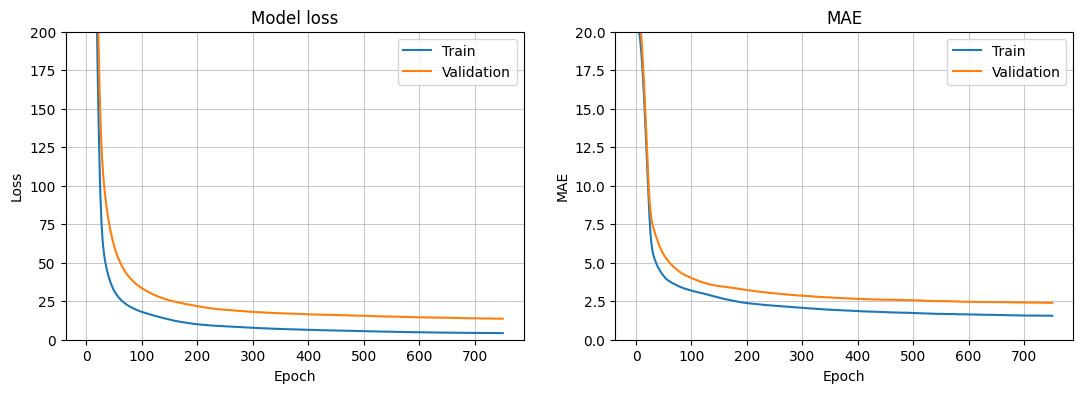

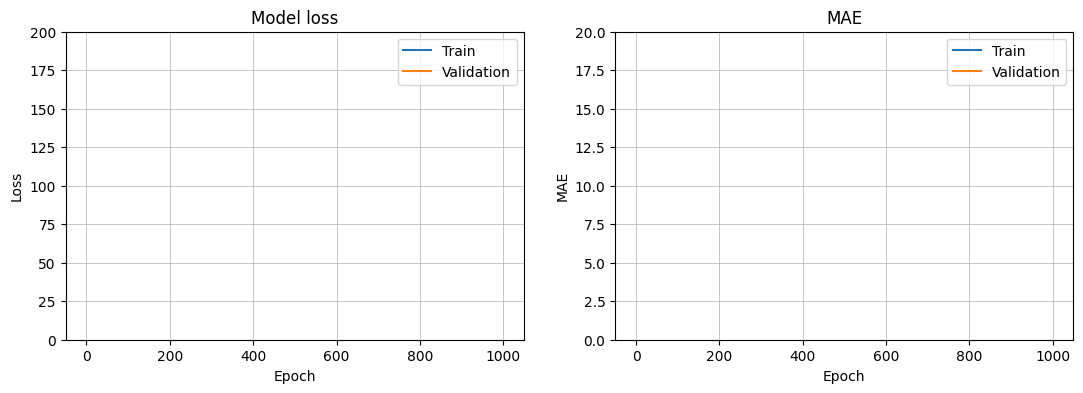

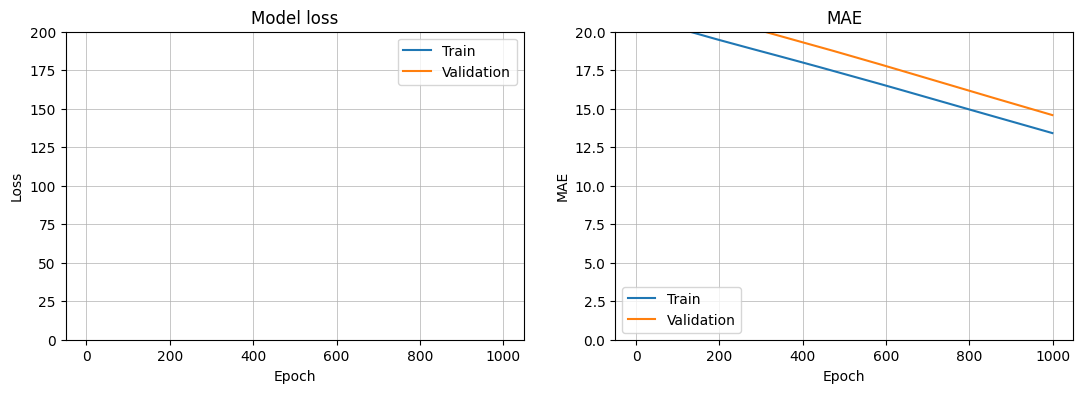

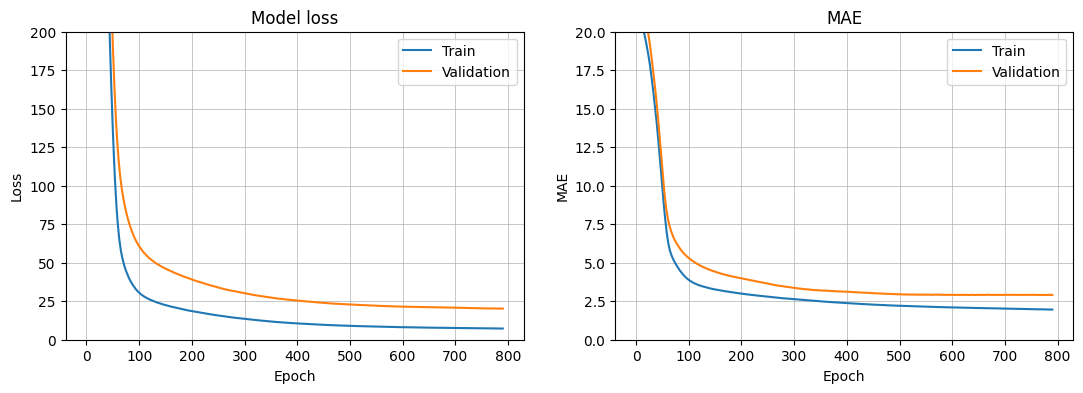

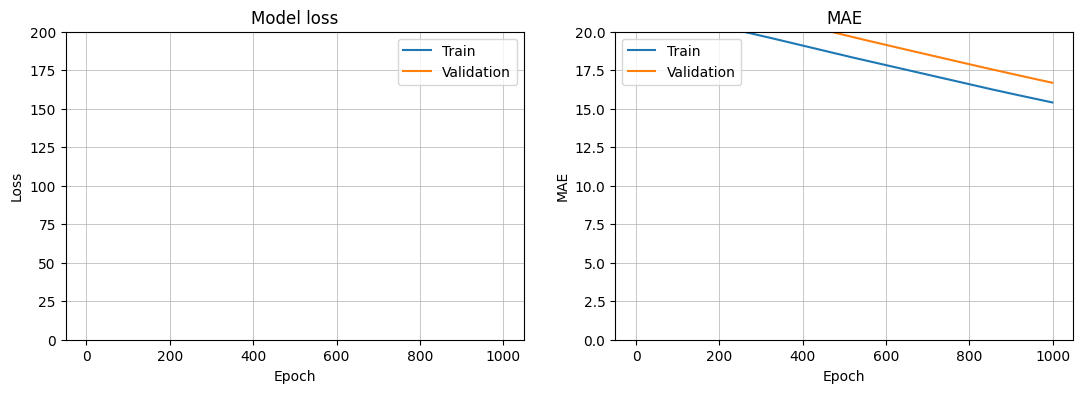

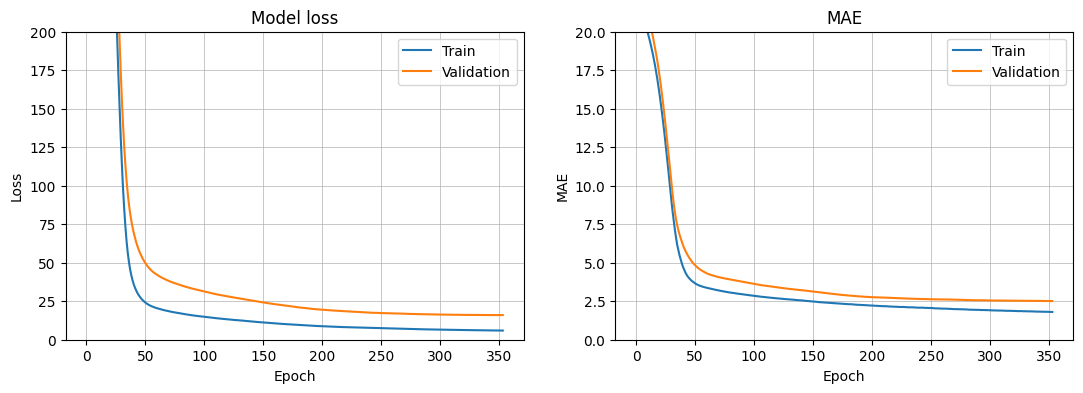

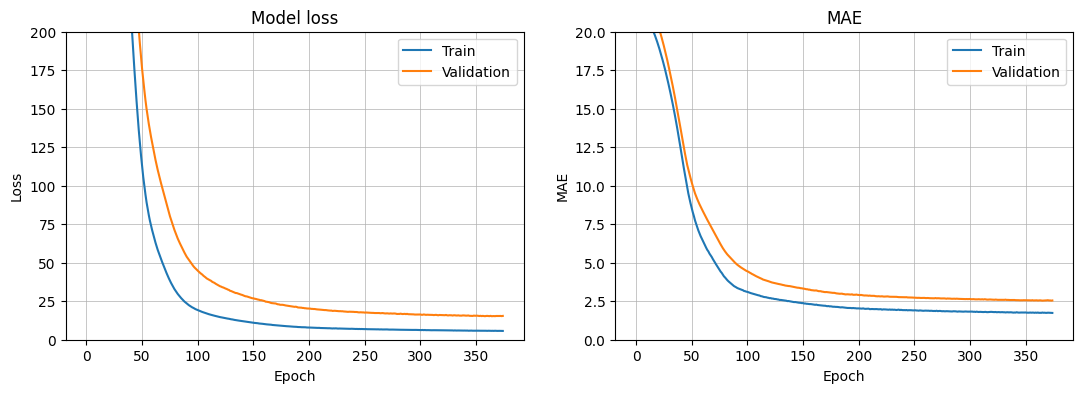

In [140]:
plot_loss_mae(history[0])
plot_loss_mae(history[1])
plot_loss_mae(history[2])
plot_loss_mae(history[3])
plot_loss_mae(history[4])
plot_loss_mae(history[5])
plot_loss_mae(history[6])

❓ **Question: a Neural Network vs a baseline - part 2** ❓ 

Are your predictions better than the baseline model you evaluated at the beginning of the notebook?

In [149]:
df

,history,scores,duration,beat_the_baseline
model,,,,
adam,<keras.callbacks.History object at 0x7f5d830c3...,2.944738,70.862831,True
adadelta,<keras.callbacks.History object at 0x7f5d81ebd...,23.240850,87.971113,False
adagrad,<keras.callbacks.History object at 0x7f5d6a296...,13.972722,89.466835,False
adamax,<keras.callbacks.History object at 0x7f5d69927...,3.087130,71.064784,True
ftrl,<keras.callbacks.History object at 0x7f5d6886b...,16.461292,87.566145,False
nadam,<keras.callbacks.History object at 0x7f5d4635b...,2.817741,31.531966,True
rmsprop,<keras.callbacks.History object at 0x7f5d460cf...,2.705065,34.511994,True


<details>
    <summary><i>Answer</i></summary>
    
You can see that the Neural Network beat the baseline when using either _adam_ or _optimizer_ but it the result was worse than the baseline with the _adagrad_ optimizer.
 
    
</details>

---

👇 The advice from the Deep Learning community is the following 👇:

* 🔥 So far, our best performing optimizer is **`adam`**. Maybe a mathematician specialized in numerical methods will find a better solver in the future but for the moment..., _"adam"_ is your best friend and he/she has already been helping us achieve remarkable results.

---

❗️ So, what's next in this challenge? ❗️

👩‍🎓 Do you remember the ***Machine Learning > 04. Under The Hood*** where we coded our ***Gradient Descent*** choosing a specific ***learning rate***? It represents how slow/fast your algorithm learns. In other words, it controls the intensity of the change of the weights at each optimization of the neural network, at each backpropagation!

🚀 Well, the ***solvers in Machine Learning*** and the ***optimizers in Deep Learning*** are advanced iterative methods relying on ***hyperparameters*** and the learning rate is one of them!

🤔 How can I control this learning rate? 

✅ Instead of calling an optimizer with a string ("adam", "rmsprop", ...) which uses a default value of the learning rate, we will call 📚 [**tf/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) objects 📚 and tailor them to our needs.

🧑🏻‍🏫 Different learning rates have different consequences, as shown here: 

<img src="learning_rate.png" alt="Learning rate" style="height:300px;"/>



### (2.2) The influence of the Learning Rate


❓ **Question: selecting an optimizer with a custom learning rate** ❓ 

📚 [**tf/keras/optimizers/Adam**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Instead of initializing the optimizer with a string, let's initialize an optimizer manually.

* Instantiate an Adam optimizer with a learning rate of $ \alpha = 0.1$
    * Keep the other values to their default values. 
* Use this optimizer in the `compile_model` function
* Train/Fit the model
* Plot the history
* Evaluate your model

Epoch 1/1000
9/9 [==============================] - 1s 28ms/step - loss: 275.7460 - mae: 13.3686 - val_loss: 84.9419 - val_mae: 6.8067
Epoch 2/1000
9/9 [==============================] - 0s 19ms/step - loss: 52.6739 - mae: 5.8893 - val_loss: 43.3365 - val_mae: 5.0880
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 30.5173 - mae: 4.1017 - val_loss: 48.4197 - val_mae: 4.5881
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 19.0638 - mae: 3.3095 - val_loss: 31.1296 - val_mae: 4.1162
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 15.4268 - mae: 2.9109 - val_loss: 26.7043 - val_mae: 3.6014
Epoch 6/1000
9/9 [==============================] - 0s 11ms/step - loss: 14.9019 - mae: 2.8432 - val_loss: 25.8239 - val_mae: 3.6788
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 13.6489 - mae: 2.7908 - val_loss: 21.6027 - val_mae: 3.2091
Epoch 8/1000
9/9 [==============================] - 0s 10ms/step - los

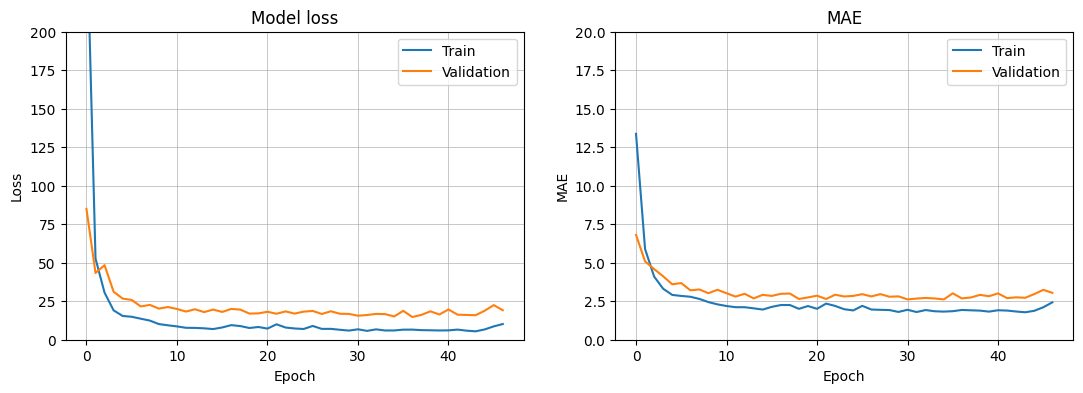

In [156]:
es = EarlyStopping(patience=10,restore_best_weights=True )
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)

model = initialize_model()
model = compile_model(model, opt)
history = model.fit(X_train_scaled, y_train,validation_split=0.3, batch_size=32,epochs=1000,callbacks=[es])

print(model.evaluate(X_test_scaled, y_test)[1])

plot_loss_mae(history)

❓ **Question: playing with learning rates** ❓ 

Now, reproduce the same plots and results but for different learning rates.

<details>
    <summary><i>Remark</i></summary>

There is a chance that the y-axis is too large for you to visualize some results with some learning rates. In that case, feel free to re-write the plot function to plot only the epochs $> 10$.
    
</details>

In [158]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 2]
results = []
history = []

for learning_rate in learning_rates:
    opt = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate)
    

Epoch 1/1000
9/9 [==============================] - 1s 31ms/step - loss: 569.8206 - mae: 22.3323 - val_loss: 664.2366 - val_mae: 23.7583
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 569.3489 - mae: 22.3192 - val_loss: 663.7230 - val_mae: 23.7445
Epoch 3/1000
9/9 [==============================] - 0s 10ms/step - loss: 568.8610 - mae: 22.3057 - val_loss: 663.2150 - val_mae: 23.7309
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 568.4012 - mae: 22.2928 - val_loss: 662.7009 - val_mae: 23.7172
Epoch 5/1000
9/9 [==============================] - 0s 12ms/step - loss: 567.9237 - mae: 22.2796 - val_loss: 662.1940 - val_mae: 23.7037
Epoch 6/1000
9/9 [==============================] - 0s 12ms/step - loss: 567.4337 - mae: 22.2661 - val_loss: 661.6971 - val_mae: 23.6906
Epoch 7/1000
9/9 [==============================] - 0s 11ms/step - loss: 566.9770 - mae: 22.2534 - val_loss: 661.1779 - val_mae: 23.6769
Epoch 8/1000
9/9 [=======================

9/9 [==============================] - 0s 11ms/step - loss: 542.6694 - mae: 21.6278 - val_loss: 633.9349 - val_mae: 23.0222
Epoch 61/1000
9/9 [==============================] - 0s 12ms/step - loss: 542.1550 - mae: 21.6156 - val_loss: 633.3834 - val_mae: 23.0102
Epoch 62/1000
9/9 [==============================] - 0s 12ms/step - loss: 541.6508 - mae: 21.6036 - val_loss: 632.8103 - val_mae: 22.9977
Epoch 63/1000
9/9 [==============================] - 0s 10ms/step - loss: 541.1098 - mae: 21.5909 - val_loss: 632.2256 - val_mae: 22.9853
Epoch 64/1000
9/9 [==============================] - 0s 13ms/step - loss: 540.5709 - mae: 21.5786 - val_loss: 631.6360 - val_mae: 22.9726
Epoch 65/1000
9/9 [==============================] - 0s 13ms/step - loss: 540.0299 - mae: 21.5659 - val_loss: 631.0361 - val_mae: 22.9598
Epoch 66/1000
9/9 [==============================] - 0s 9ms/step - loss: 539.4734 - mae: 21.5532 - val_loss: 630.4311 - val_mae: 22.9468
Epoch 67/1000
9/9 [==============================

9/9 [==============================] - 0s 10ms/step - loss: 500.1982 - mae: 20.6628 - val_loss: 588.9297 - val_mae: 22.0449
Epoch 120/1000
9/9 [==============================] - 0s 9ms/step - loss: 499.3011 - mae: 20.6417 - val_loss: 587.9802 - val_mae: 22.0238
Epoch 121/1000
9/9 [==============================] - 0s 9ms/step - loss: 498.3974 - mae: 20.6207 - val_loss: 587.0240 - val_mae: 22.0023
Epoch 122/1000
9/9 [==============================] - 0s 10ms/step - loss: 497.4943 - mae: 20.5991 - val_loss: 586.0520 - val_mae: 21.9806
Epoch 123/1000
9/9 [==============================] - 0s 9ms/step - loss: 496.5761 - mae: 20.5776 - val_loss: 585.0826 - val_mae: 21.9587
Epoch 124/1000
9/9 [==============================] - 0s 9ms/step - loss: 495.6426 - mae: 20.5557 - val_loss: 584.1129 - val_mae: 21.9368
Epoch 125/1000
9/9 [==============================] - 0s 9ms/step - loss: 494.7228 - mae: 20.5338 - val_loss: 583.1290 - val_mae: 21.9146
Epoch 126/1000
9/9 [===========================

9/9 [==============================] - 0s 9ms/step - loss: 432.4617 - mae: 18.9759 - val_loss: 517.6831 - val_mae: 20.3492
Epoch 179/1000
9/9 [==============================] - 0s 9ms/step - loss: 431.0837 - mae: 18.9383 - val_loss: 516.2131 - val_mae: 20.3112
Epoch 180/1000
9/9 [==============================] - 0s 9ms/step - loss: 429.7025 - mae: 18.9011 - val_loss: 514.7149 - val_mae: 20.2724
Epoch 181/1000
9/9 [==============================] - 0s 8ms/step - loss: 428.2416 - mae: 18.8612 - val_loss: 513.2512 - val_mae: 20.2344
Epoch 182/1000
9/9 [==============================] - 0s 8ms/step - loss: 426.8340 - mae: 18.8235 - val_loss: 511.7645 - val_mae: 20.1954
Epoch 183/1000
9/9 [==============================] - 0s 9ms/step - loss: 425.4057 - mae: 18.7853 - val_loss: 510.2689 - val_mae: 20.1565
Epoch 184/1000
9/9 [==============================] - 0s 9ms/step - loss: 423.9599 - mae: 18.7460 - val_loss: 508.7751 - val_mae: 20.1176
Epoch 185/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 345.2998 - mae: 16.5483 - val_loss: 425.5122 - val_mae: 17.9259
Epoch 238/1000
9/9 [==============================] - 0s 9ms/step - loss: 343.7547 - mae: 16.5066 - val_loss: 423.9344 - val_mae: 17.8840
Epoch 239/1000
9/9 [==============================] - 0s 8ms/step - loss: 342.2944 - mae: 16.4640 - val_loss: 422.3183 - val_mae: 17.8422
Epoch 240/1000
9/9 [==============================] - 0s 9ms/step - loss: 340.7556 - mae: 16.4215 - val_loss: 420.7448 - val_mae: 17.8008
Epoch 241/1000
9/9 [==============================] - 0s 9ms/step - loss: 339.2628 - mae: 16.3789 - val_loss: 419.1602 - val_mae: 17.7593
Epoch 242/1000
9/9 [==============================] - 0s 9ms/step - loss: 337.7873 - mae: 16.3375 - val_loss: 417.5536 - val_mae: 17.7171
Epoch 243/1000
9/9 [==============================] - 0s 9ms/step - loss: 336.2885 - mae: 16.2948 - val_loss: 415.9530 - val_mae: 17.6748
Epoch 244/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 259.2920 - mae: 14.0124 - val_loss: 333.4432 - val_mae: 15.4474
Epoch 297/1000
9/9 [==============================] - 0s 9ms/step - loss: 257.9735 - mae: 13.9696 - val_loss: 331.9193 - val_mae: 15.4048
Epoch 298/1000
9/9 [==============================] - 0s 8ms/step - loss: 256.5828 - mae: 13.9251 - val_loss: 330.4113 - val_mae: 15.3628
Epoch 299/1000
9/9 [==============================] - 0s 9ms/step - loss: 255.1882 - mae: 13.8812 - val_loss: 328.9208 - val_mae: 15.3223
Epoch 300/1000
9/9 [==============================] - 0s 9ms/step - loss: 253.8015 - mae: 13.8380 - val_loss: 327.4352 - val_mae: 15.2822
Epoch 301/1000
9/9 [==============================] - 0s 9ms/step - loss: 252.4279 - mae: 13.7945 - val_loss: 325.9618 - val_mae: 15.2423
Epoch 302/1000
9/9 [==============================] - 0s 9ms/step - loss: 251.0764 - mae: 13.7510 - val_loss: 324.4736 - val_mae: 15.2018
Epoch 303/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 184.4047 - mae: 11.4997 - val_loss: 251.6086 - val_mae: 13.0296
Epoch 356/1000
9/9 [==============================] - 0s 9ms/step - loss: 183.2753 - mae: 11.4587 - val_loss: 250.3539 - val_mae: 12.9888
Epoch 357/1000
9/9 [==============================] - 0s 9ms/step - loss: 182.1612 - mae: 11.4167 - val_loss: 249.0914 - val_mae: 12.9476
Epoch 358/1000
9/9 [==============================] - 0s 9ms/step - loss: 181.0071 - mae: 11.3748 - val_loss: 247.8665 - val_mae: 12.9073
Epoch 359/1000
9/9 [==============================] - 0s 10ms/step - loss: 179.9167 - mae: 11.3337 - val_loss: 246.6178 - val_mae: 12.8660
Epoch 360/1000
9/9 [==============================] - 0s 14ms/step - loss: 178.7950 - mae: 11.2909 - val_loss: 245.3889 - val_mae: 12.8251
Epoch 361/1000
9/9 [==============================] - 0s 14ms/step - loss: 177.6837 - mae: 11.2507 - val_loss: 244.1662 - val_mae: 12.7843
Epoch 362/1000
9/9 [==========================

9/9 [==============================] - 0s 10ms/step - loss: 126.8463 - mae: 9.1676 - val_loss: 187.0748 - val_mae: 10.6296
Epoch 415/1000
9/9 [==============================] - 0s 12ms/step - loss: 126.0232 - mae: 9.1302 - val_loss: 186.1607 - val_mae: 10.5900
Epoch 416/1000
9/9 [==============================] - 0s 13ms/step - loss: 125.2447 - mae: 9.0963 - val_loss: 185.2299 - val_mae: 10.5492
Epoch 417/1000
9/9 [==============================] - 0s 14ms/step - loss: 124.4322 - mae: 9.0590 - val_loss: 184.3142 - val_mae: 10.5091
Epoch 418/1000
9/9 [==============================] - 0s 10ms/step - loss: 123.6584 - mae: 9.0249 - val_loss: 183.3917 - val_mae: 10.4683
Epoch 419/1000
9/9 [==============================] - 0s 14ms/step - loss: 122.8405 - mae: 8.9888 - val_loss: 182.5022 - val_mae: 10.4299
Epoch 420/1000
9/9 [==============================] - 0s 10ms/step - loss: 122.0683 - mae: 8.9542 - val_loss: 181.6106 - val_mae: 10.3907
Epoch 421/1000
9/9 [=============================

9/9 [==============================] - 0s 9ms/step - loss: 87.4354 - mae: 7.3500 - val_loss: 140.3790 - val_mae: 8.6677
Epoch 475/1000
9/9 [==============================] - 0s 9ms/step - loss: 86.9356 - mae: 7.3254 - val_loss: 139.7332 - val_mae: 8.6439
Epoch 476/1000
9/9 [==============================] - 0s 9ms/step - loss: 86.4140 - mae: 7.3020 - val_loss: 139.0982 - val_mae: 8.6206
Epoch 477/1000
9/9 [==============================] - 0s 11ms/step - loss: 85.9153 - mae: 7.2773 - val_loss: 138.4576 - val_mae: 8.5970
Epoch 478/1000
9/9 [==============================] - 0s 19ms/step - loss: 85.4029 - mae: 7.2532 - val_loss: 137.8375 - val_mae: 8.5739
Epoch 479/1000
9/9 [==============================] - 0s 11ms/step - loss: 84.9160 - mae: 7.2306 - val_loss: 137.2139 - val_mae: 8.5505
Epoch 480/1000
9/9 [==============================] - 0s 10ms/step - loss: 84.4133 - mae: 7.2080 - val_loss: 136.6085 - val_mae: 8.5273
Epoch 481/1000
9/9 [==============================] - 0s 9ms/step 

9/9 [==============================] - 0s 10ms/step - loss: 62.6357 - mae: 6.1388 - val_loss: 108.1664 - val_mae: 7.5140
Epoch 535/1000
9/9 [==============================] - 0s 10ms/step - loss: 62.3241 - mae: 6.1227 - val_loss: 107.7202 - val_mae: 7.4980
Epoch 536/1000
9/9 [==============================] - 0s 9ms/step - loss: 61.9977 - mae: 6.1044 - val_loss: 107.2740 - val_mae: 7.4818
Epoch 537/1000
9/9 [==============================] - 0s 14ms/step - loss: 61.6787 - mae: 6.0872 - val_loss: 106.8143 - val_mae: 7.4656
Epoch 538/1000
9/9 [==============================] - 0s 13ms/step - loss: 61.3465 - mae: 6.0701 - val_loss: 106.3760 - val_mae: 7.4495
Epoch 539/1000
9/9 [==============================] - 0s 10ms/step - loss: 61.0278 - mae: 6.0527 - val_loss: 105.9444 - val_mae: 7.4336
Epoch 540/1000
9/9 [==============================] - 0s 10ms/step - loss: 60.7229 - mae: 6.0355 - val_loss: 105.4958 - val_mae: 7.4171
Epoch 541/1000
9/9 [==============================] - 0s 11ms/st

Epoch 595/1000
9/9 [==============================] - 0s 10ms/step - loss: 46.1978 - mae: 5.2273 - val_loss: 84.7964 - val_mae: 6.5710
Epoch 596/1000
9/9 [==============================] - 0s 10ms/step - loss: 45.9825 - mae: 5.2139 - val_loss: 84.4577 - val_mae: 6.5553
Epoch 597/1000
9/9 [==============================] - 0s 10ms/step - loss: 45.7579 - mae: 5.2003 - val_loss: 84.1350 - val_mae: 6.5401
Epoch 598/1000
9/9 [==============================] - 0s 9ms/step - loss: 45.5332 - mae: 5.1864 - val_loss: 83.8211 - val_mae: 6.5253
Epoch 599/1000
9/9 [==============================] - 0s 9ms/step - loss: 45.3250 - mae: 5.1733 - val_loss: 83.5023 - val_mae: 6.5101
Epoch 600/1000
9/9 [==============================] - 0s 10ms/step - loss: 45.1148 - mae: 5.1606 - val_loss: 83.1847 - val_mae: 6.4949
Epoch 601/1000
9/9 [==============================] - 0s 10ms/step - loss: 44.9001 - mae: 5.1471 - val_loss: 82.8648 - val_mae: 6.4796
Epoch 602/1000
9/9 [==============================] - 0s 

Epoch 656/1000
9/9 [==============================] - 0s 10ms/step - loss: 35.1214 - mae: 4.4991 - val_loss: 67.7852 - val_mae: 5.7465
Epoch 657/1000
9/9 [==============================] - 0s 9ms/step - loss: 34.9687 - mae: 4.4888 - val_loss: 67.5555 - val_mae: 5.7345
Epoch 658/1000
9/9 [==============================] - 0s 8ms/step - loss: 34.8275 - mae: 4.4787 - val_loss: 67.3186 - val_mae: 5.7226
Epoch 659/1000
9/9 [==============================] - 0s 9ms/step - loss: 34.6807 - mae: 4.4684 - val_loss: 67.0931 - val_mae: 5.7108
Epoch 660/1000
9/9 [==============================] - 0s 9ms/step - loss: 34.5519 - mae: 4.4589 - val_loss: 66.8442 - val_mae: 5.6990
Epoch 661/1000
9/9 [==============================] - 0s 9ms/step - loss: 34.3934 - mae: 4.4483 - val_loss: 66.6280 - val_mae: 5.6878
Epoch 662/1000
9/9 [==============================] - 0s 9ms/step - loss: 34.2559 - mae: 4.4382 - val_loss: 66.4039 - val_mae: 5.6761
Epoch 663/1000
9/9 [==============================] - 0s 9ms/

Epoch 717/1000
9/9 [==============================] - 0s 10ms/step - loss: 27.8603 - mae: 3.9577 - val_loss: 55.7650 - val_mae: 5.1186
Epoch 718/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.7637 - mae: 3.9497 - val_loss: 55.6089 - val_mae: 5.1092
Epoch 719/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.6714 - mae: 3.9420 - val_loss: 55.4662 - val_mae: 5.0994
Epoch 720/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.5857 - mae: 3.9344 - val_loss: 55.2852 - val_mae: 5.0904
Epoch 721/1000
9/9 [==============================] - 0s 10ms/step - loss: 27.4898 - mae: 3.9271 - val_loss: 55.1200 - val_mae: 5.0817
Epoch 722/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.3909 - mae: 3.9189 - val_loss: 54.9600 - val_mae: 5.0717
Epoch 723/1000
9/9 [==============================] - 0s 9ms/step - loss: 27.2998 - mae: 3.9113 - val_loss: 54.8027 - val_mae: 5.0635
Epoch 724/1000
9/9 [==============================] - 0s 9ms

9/9 [==============================] - 0s 10ms/step - loss: 23.1330 - mae: 3.5370 - val_loss: 47.4641 - val_mae: 4.6162
Epoch 779/1000
9/9 [==============================] - 0s 9ms/step - loss: 23.0690 - mae: 3.5314 - val_loss: 47.3624 - val_mae: 4.6086
Epoch 780/1000
9/9 [==============================] - 0s 9ms/step - loss: 23.0060 - mae: 3.5254 - val_loss: 47.2604 - val_mae: 4.6015
Epoch 781/1000
9/9 [==============================] - 0s 9ms/step - loss: 22.9476 - mae: 3.5199 - val_loss: 47.1443 - val_mae: 4.5937
Epoch 782/1000
9/9 [==============================] - 0s 9ms/step - loss: 22.8883 - mae: 3.5143 - val_loss: 47.0217 - val_mae: 4.5868
Epoch 783/1000
9/9 [==============================] - 0s 9ms/step - loss: 22.8217 - mae: 3.5083 - val_loss: 46.9198 - val_mae: 4.5795
Epoch 784/1000
9/9 [==============================] - 0s 9ms/step - loss: 22.7633 - mae: 3.5029 - val_loss: 46.8072 - val_mae: 4.5723
Epoch 785/1000
9/9 [==============================] - 0s 9ms/step - loss: 22

9/9 [==============================] - 0s 9ms/step - loss: 20.0276 - mae: 3.2492 - val_loss: 41.7904 - val_mae: 4.2568
Epoch 840/1000
9/9 [==============================] - 0s 9ms/step - loss: 19.9826 - mae: 3.2454 - val_loss: 41.7257 - val_mae: 4.2529
Epoch 841/1000
9/9 [==============================] - 0s 9ms/step - loss: 19.9434 - mae: 3.2416 - val_loss: 41.6480 - val_mae: 4.2484
Epoch 842/1000
9/9 [==============================] - 0s 9ms/step - loss: 19.9056 - mae: 3.2385 - val_loss: 41.5821 - val_mae: 4.2428
Epoch 843/1000
9/9 [==============================] - 0s 9ms/step - loss: 19.8642 - mae: 3.2347 - val_loss: 41.4946 - val_mae: 4.2381
Epoch 844/1000
9/9 [==============================] - 0s 9ms/step - loss: 19.8238 - mae: 3.2311 - val_loss: 41.4191 - val_mae: 4.2345
Epoch 845/1000
9/9 [==============================] - 0s 9ms/step - loss: 19.7844 - mae: 3.2278 - val_loss: 41.3369 - val_mae: 4.2299
Epoch 846/1000
9/9 [==============================] - 0s 9ms/step - loss: 19.

9/9 [==============================] - 0s 9ms/step - loss: 17.9591 - mae: 3.0589 - val_loss: 37.7899 - val_mae: 4.0069
Epoch 901/1000
9/9 [==============================] - 0s 9ms/step - loss: 17.9366 - mae: 3.0567 - val_loss: 37.7262 - val_mae: 4.0039
Epoch 902/1000
9/9 [==============================] - 0s 9ms/step - loss: 17.9066 - mae: 3.0540 - val_loss: 37.6722 - val_mae: 4.0002
Epoch 903/1000
9/9 [==============================] - 0s 8ms/step - loss: 17.8808 - mae: 3.0510 - val_loss: 37.6152 - val_mae: 3.9961
Epoch 904/1000
9/9 [==============================] - 0s 9ms/step - loss: 17.8519 - mae: 3.0483 - val_loss: 37.5627 - val_mae: 3.9927
Epoch 905/1000
9/9 [==============================] - 0s 9ms/step - loss: 17.8247 - mae: 3.0457 - val_loss: 37.5142 - val_mae: 3.9894
Epoch 906/1000
9/9 [==============================] - 0s 9ms/step - loss: 17.7957 - mae: 3.0429 - val_loss: 37.4705 - val_mae: 3.9862
Epoch 907/1000
9/9 [==============================] - 0s 9ms/step - loss: 17.

9/9 [==============================] - 0s 9ms/step - loss: 16.5006 - mae: 2.9175 - val_loss: 34.8675 - val_mae: 3.8152
Epoch 962/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.4833 - mae: 2.9162 - val_loss: 34.8152 - val_mae: 3.8129
Epoch 963/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.4598 - mae: 2.9142 - val_loss: 34.7783 - val_mae: 3.8106
Epoch 964/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.4410 - mae: 2.9122 - val_loss: 34.7490 - val_mae: 3.8080
Epoch 965/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.4222 - mae: 2.9104 - val_loss: 34.6945 - val_mae: 3.8053
Epoch 966/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.3991 - mae: 2.9087 - val_loss: 34.6585 - val_mae: 3.8035
Epoch 967/1000
9/9 [==============================] - 0s 9ms/step - loss: 16.3782 - mae: 2.9065 - val_loss: 34.6281 - val_mae: 3.8013
Epoch 968/1000
9/9 [==============================] - 0s 8ms/step - loss: 16.

9/9 [==============================] - 0s 9ms/step - loss: 223.9639 - mae: 13.3660 - val_loss: 269.6564 - val_mae: 13.7597
Epoch 22/1000
9/9 [==============================] - 0s 9ms/step - loss: 200.3615 - mae: 12.4834 - val_loss: 243.4636 - val_mae: 12.7918
Epoch 23/1000
9/9 [==============================] - 0s 9ms/step - loss: 176.7834 - mae: 11.5807 - val_loss: 219.6255 - val_mae: 11.8480
Epoch 24/1000
9/9 [==============================] - 0s 9ms/step - loss: 155.3835 - mae: 10.6989 - val_loss: 197.9535 - val_mae: 11.0223
Epoch 25/1000
9/9 [==============================] - 0s 9ms/step - loss: 136.9412 - mae: 9.8562 - val_loss: 178.4075 - val_mae: 10.3247
Epoch 26/1000
9/9 [==============================] - 0s 8ms/step - loss: 119.8549 - mae: 9.1410 - val_loss: 162.1086 - val_mae: 9.7558
Epoch 27/1000
9/9 [==============================] - 0s 8ms/step - loss: 106.0083 - mae: 8.5147 - val_loss: 148.0952 - val_mae: 9.2464
Epoch 28/1000
9/9 [==============================] - 0s 9ms/

9/9 [==============================] - 0s 9ms/step - loss: 15.0265 - mae: 2.8647 - val_loss: 32.5221 - val_mae: 3.6799
Epoch 83/1000
9/9 [==============================] - 0s 9ms/step - loss: 14.9257 - mae: 2.8553 - val_loss: 32.4307 - val_mae: 3.6666
Epoch 84/1000
9/9 [==============================] - 0s 8ms/step - loss: 14.8324 - mae: 2.8453 - val_loss: 32.2929 - val_mae: 3.6540
Epoch 85/1000
9/9 [==============================] - 0s 9ms/step - loss: 14.7647 - mae: 2.8388 - val_loss: 32.0618 - val_mae: 3.6461
Epoch 86/1000
9/9 [==============================] - 0s 9ms/step - loss: 14.6826 - mae: 2.8337 - val_loss: 31.8584 - val_mae: 3.6333
Epoch 87/1000
9/9 [==============================] - 0s 9ms/step - loss: 14.5934 - mae: 2.8240 - val_loss: 31.7297 - val_mae: 3.6268
Epoch 88/1000
9/9 [==============================] - 0s 9ms/step - loss: 14.5303 - mae: 2.8144 - val_loss: 31.7104 - val_mae: 3.6189
Epoch 89/1000
9/9 [==============================] - 0s 9ms/step - loss: 14.4437 - 

9/9 [==============================] - 0s 9ms/step - loss: 11.0408 - mae: 2.4779 - val_loss: 24.7074 - val_mae: 3.1856
Epoch 144/1000
9/9 [==============================] - 0s 8ms/step - loss: 10.9689 - mae: 2.4697 - val_loss: 24.6890 - val_mae: 3.1802
Epoch 145/1000
9/9 [==============================] - 0s 8ms/step - loss: 10.8992 - mae: 2.4574 - val_loss: 24.5371 - val_mae: 3.1615
Epoch 146/1000
9/9 [==============================] - 0s 8ms/step - loss: 10.8448 - mae: 2.4503 - val_loss: 24.3926 - val_mae: 3.1526
Epoch 147/1000
9/9 [==============================] - 0s 8ms/step - loss: 10.7776 - mae: 2.4423 - val_loss: 24.2886 - val_mae: 3.1451
Epoch 148/1000
9/9 [==============================] - 0s 9ms/step - loss: 10.7180 - mae: 2.4356 - val_loss: 24.1581 - val_mae: 3.1417
Epoch 149/1000
9/9 [==============================] - 0s 9ms/step - loss: 10.6820 - mae: 2.4315 - val_loss: 24.1694 - val_mae: 3.1457
Epoch 150/1000
9/9 [==============================] - 0s 9ms/step - loss: 10.

9/9 [==============================] - 0s 9ms/step - loss: 8.0545 - mae: 2.1128 - val_loss: 19.6494 - val_mae: 2.8309
Epoch 205/1000
9/9 [==============================] - 0s 9ms/step - loss: 8.0352 - mae: 2.1103 - val_loss: 19.6046 - val_mae: 2.8403
Epoch 206/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.9838 - mae: 2.1048 - val_loss: 19.5670 - val_mae: 2.8335
Epoch 207/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.9739 - mae: 2.1029 - val_loss: 19.5876 - val_mae: 2.8337
Epoch 208/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.9414 - mae: 2.0999 - val_loss: 19.4747 - val_mae: 2.8284
Epoch 209/1000
9/9 [==============================] - 0s 9ms/step - loss: 7.9124 - mae: 2.0980 - val_loss: 19.4568 - val_mae: 2.8282
Epoch 210/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.9217 - mae: 2.0971 - val_loss: 19.4526 - val_mae: 2.8362
Epoch 211/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.9054 - m

9/9 [==============================] - 0s 9ms/step - loss: 6.8948 - mae: 1.9810 - val_loss: 17.8244 - val_mae: 2.7452
Epoch 266/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8907 - mae: 1.9813 - val_loss: 17.8212 - val_mae: 2.7459
Epoch 267/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8688 - mae: 1.9791 - val_loss: 17.7371 - val_mae: 2.7369
Epoch 268/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.8560 - mae: 1.9781 - val_loss: 17.7251 - val_mae: 2.7390
Epoch 269/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.8416 - mae: 1.9714 - val_loss: 17.7350 - val_mae: 2.7390
Epoch 270/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8205 - mae: 1.9697 - val_loss: 17.7468 - val_mae: 2.7409
Epoch 271/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8068 - mae: 1.9698 - val_loss: 17.7079 - val_mae: 2.7364
Epoch 272/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.8088 - m

Epoch 327/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.2078 - mae: 1.8834 - val_loss: 17.0910 - val_mae: 2.7011
Epoch 328/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.2055 - mae: 1.8804 - val_loss: 17.0525 - val_mae: 2.6969
Epoch 329/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.2045 - mae: 1.8745 - val_loss: 17.0750 - val_mae: 2.7018
Epoch 330/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.2119 - mae: 1.8805 - val_loss: 17.0421 - val_mae: 2.6967
Epoch 331/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.1871 - mae: 1.8751 - val_loss: 17.0737 - val_mae: 2.7025
Epoch 332/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.1664 - mae: 1.8751 - val_loss: 17.0403 - val_mae: 2.6991
Epoch 333/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.1703 - mae: 1.8737 - val_loss: 17.0571 - val_mae: 2.6992
Epoch 334/1000
9/9 [==============================] - 0s 9ms/step - l

9/9 [==============================] - 0s 8ms/step - loss: 5.8435 - mae: 1.8280 - val_loss: 16.8850 - val_mae: 2.6918
Epoch 389/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.8391 - mae: 1.8306 - val_loss: 16.8422 - val_mae: 2.6867
Epoch 390/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.8255 - mae: 1.8273 - val_loss: 16.9050 - val_mae: 2.6996
Epoch 391/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.8463 - mae: 1.8320 - val_loss: 16.8972 - val_mae: 2.6942
Epoch 392/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.8160 - mae: 1.8269 - val_loss: 16.8649 - val_mae: 2.6898
Epoch 393/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.8036 - mae: 1.8221 - val_loss: 16.8597 - val_mae: 2.6873
Epoch 394/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.8276 - mae: 1.8229 - val_loss: 16.8708 - val_mae: 2.6901
Epoch 395/1000
4/4 [==============================] - 0s 3ms/step - loss: 22.4305 - 

9/9 [==============================] - 0s 9ms/step - loss: 7.2888 - mae: 2.0380 - val_loss: 17.9923 - val_mae: 2.7215
Epoch 55/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.1329 - mae: 1.9857 - val_loss: 18.0672 - val_mae: 2.7230
Epoch 56/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.1068 - mae: 1.9916 - val_loss: 17.8601 - val_mae: 2.7103
Epoch 57/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.0756 - mae: 1.9989 - val_loss: 17.8766 - val_mae: 2.7161
Epoch 58/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.1186 - mae: 1.9644 - val_loss: 18.2377 - val_mae: 2.7619
Epoch 59/1000
9/9 [==============================] - 0s 8ms/step - loss: 7.0707 - mae: 2.0114 - val_loss: 17.5767 - val_mae: 2.6906
Epoch 60/1000
9/9 [==============================] - 0s 10ms/step - loss: 7.0725 - mae: 1.9722 - val_loss: 17.5875 - val_mae: 2.6853
Epoch 61/1000
9/9 [==============================] - 0s 8ms/step - loss: 6.9482 - mae: 1.

9/9 [==============================] - 0s 16ms/step - loss: 5.7884 - mae: 1.7747 - val_loss: 16.6461 - val_mae: 2.6326
Epoch 117/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.9778 - mae: 1.8198 - val_loss: 16.7113 - val_mae: 2.6361
Epoch 118/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.9432 - mae: 1.8245 - val_loss: 17.5788 - val_mae: 2.7374
Epoch 119/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.9890 - mae: 1.8511 - val_loss: 16.4490 - val_mae: 2.6318
Epoch 120/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.6174 - mae: 1.7472 - val_loss: 17.1754 - val_mae: 2.6653
Epoch 121/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.7522 - mae: 1.7921 - val_loss: 16.5556 - val_mae: 2.6108
Epoch 122/1000
9/9 [==============================] - 0s 8ms/step - loss: 5.7182 - mae: 1.7736 - val_loss: 16.5352 - val_mae: 2.6272
Epoch 123/1000
9/9 [==============================] - 0s 9ms/step - loss: 5.7820 - 

9/9 [==============================] - 0s 9ms/step - loss: 129.2964 - mae: 8.4070 - val_loss: 159.5343 - val_mae: 8.9638
Epoch 10/1000
9/9 [==============================] - 0s 9ms/step - loss: 103.4065 - mae: 7.2828 - val_loss: 135.7832 - val_mae: 7.9474
Epoch 11/1000
9/9 [==============================] - 0s 8ms/step - loss: 89.6838 - mae: 6.6718 - val_loss: 121.7505 - val_mae: 7.3865
Epoch 12/1000
9/9 [==============================] - 0s 9ms/step - loss: 81.3080 - mae: 6.3386 - val_loss: 114.4638 - val_mae: 7.1959
Epoch 13/1000
9/9 [==============================] - 0s 9ms/step - loss: 78.2136 - mae: 6.2438 - val_loss: 110.2671 - val_mae: 7.1556
Epoch 14/1000
9/9 [==============================] - 0s 9ms/step - loss: 76.5919 - mae: 6.2356 - val_loss: 108.0760 - val_mae: 7.1712
Epoch 15/1000
9/9 [==============================] - 0s 9ms/step - loss: 75.9495 - mae: 6.2575 - val_loss: 107.0058 - val_mae: 7.1837
Epoch 16/1000
9/9 [==============================] - 0s 9ms/step - loss: 7

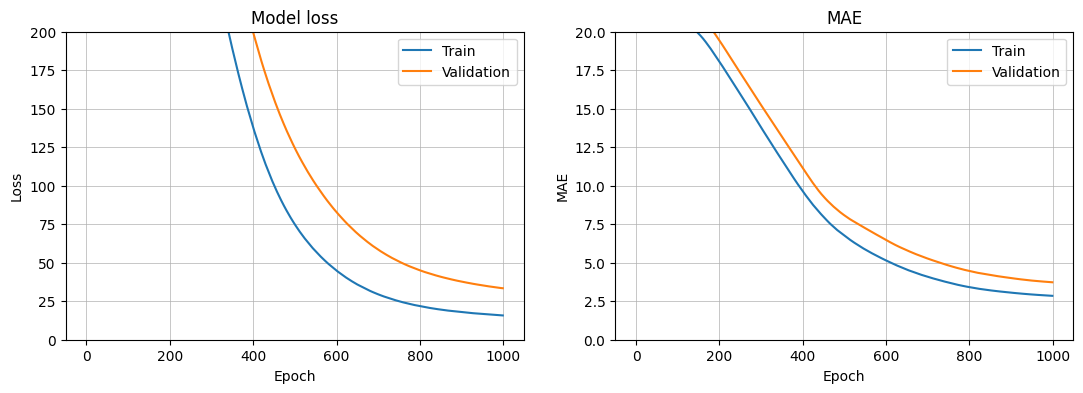

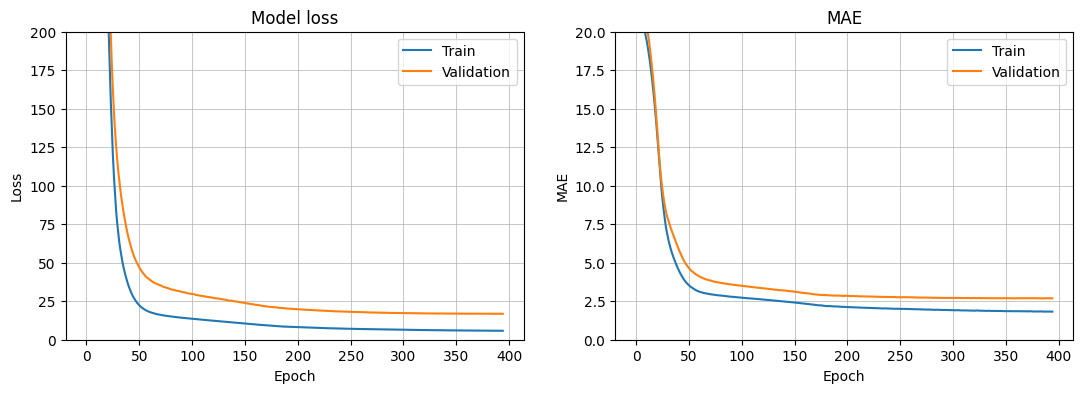

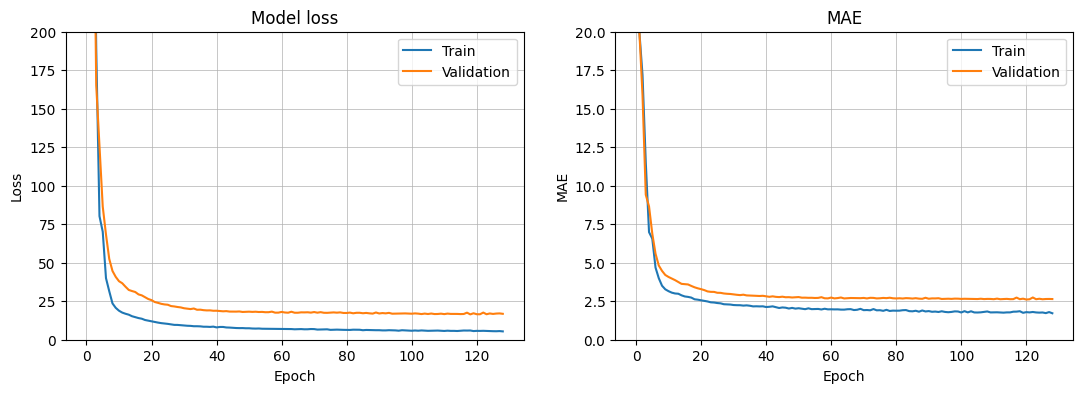

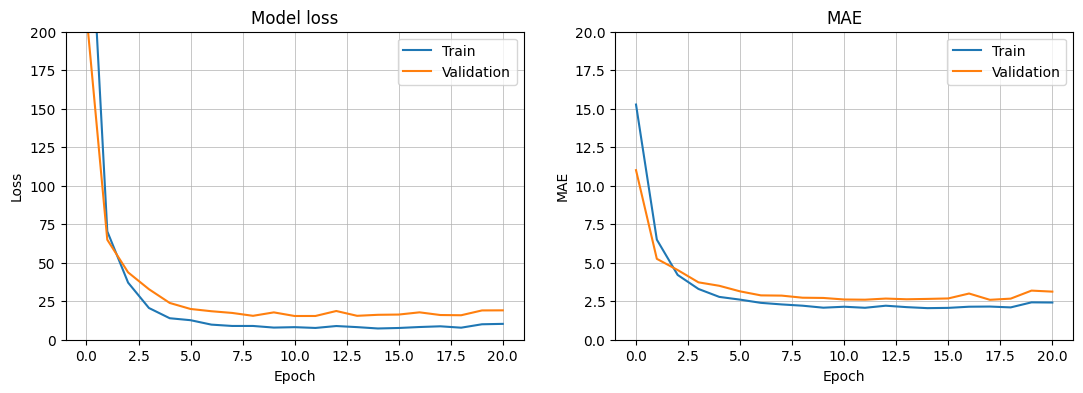

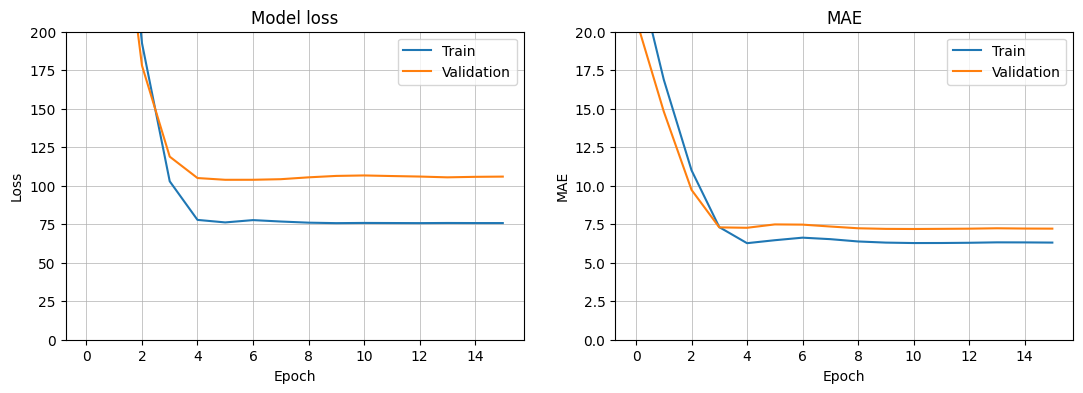

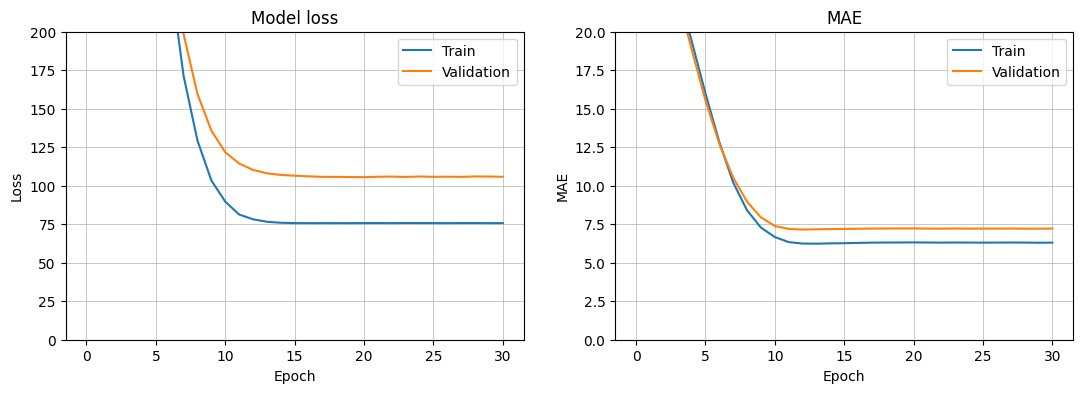

In [160]:
plot_loss_mae(history[0])
plot_loss_mae(history[1])
plot_loss_mae(history[2])
plot_loss_mae(history[3])
plot_loss_mae(history[4])
plot_loss_mae(history[5])

## (3) The loss

---

❗️ It's important to **clearly understand the difference between losses and metrics**. ❗️

* 🏋🏻‍♀️ The **loss functions** are computed ***during the training procedure***
    - For Regression tasks, the classic loss functions are: (Root) Mean Squared Error ((R)MSE), Mean Absolute Error (MAE), Mean Squared Logarithmic Error (MSLE as seen during the Kaggle Challenge)
    - For Classification tasks, the classic loss functions are: Binary Crossentropy (also known as LogLoss), the Categorical Crossentropy, the Hinge Loss, ...
* 🧑🏻‍🏫 The **metrics** are computed ***to evaluate your models, after training them***!
    - For Regression tasks, common metrics are: MSE, MAE, RMSE, Coefficient of Determination R2, ...
    - For Classification tasks, common metrics are: Accuracy, Recall, Precision, F1-Score
* 👀 Notice that some metrics can also be used as loss functions... as long as they are differentiable! (e.g. the *MSE*)

If these notions are not clear, we strongly advise to review ***Machine Learning > 03. Performance Metrics*** and ***Machine Learning > 05. Model Tuning***>

---

⏩ Alright, after this reminder, let's move on:

❓ **Question: optimizing a model with respect to a certain loss function** ❓ 

* Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  
* In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [169]:
def compile_model2(model,loss, optimizer_name, metric):
    model.compile(optimizer=optimizer_name,loss=loss, metrics=[metric])
    return model

In [172]:
history = []

loss = ['mae','mse']
metrics = ['mse','mae']

for l in loss:
    for m in metrics:
        model = initialize_model()
        model = compile_model2(model,l, opt,m)
        history.append(model.fit(X_train_scaled, y_train,validation_split=0.3, batch_size=32,epochs=1000,callbacks=[es]))


Epoch 1/1000
9/9 [==============================] - 1s 29ms/step - loss: 3015.9429 - mse: 144999952.0000 - val_loss: 11.0316 - val_mse: 154.5445
Epoch 2/1000
9/9 [==============================] - 0s 10ms/step - loss: 8.1527 - mse: 116.7356 - val_loss: 7.2260 - val_mse: 115.9448
Epoch 3/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.9818 - mse: 85.3255 - val_loss: 7.8693 - val_mse: 133.8473
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.2707 - mse: 79.4548 - val_loss: 7.5314 - val_mse: 103.8483
Epoch 5/1000
9/9 [==============================] - 0s 10ms/step - loss: 6.5111 - mse: 80.5825 - val_loss: 7.1555 - val_mse: 111.7346
Epoch 6/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.2530 - mse: 76.4472 - val_loss: 7.1565 - val_mse: 110.1283
Epoch 7/1000
9/9 [==============================] - 0s 9ms/step - loss: 6.3534 - mse: 79.5093 - val_loss: 7.1541 - val_mse: 111.3587
Epoch 8/1000
9/9 [==============================] - 0s

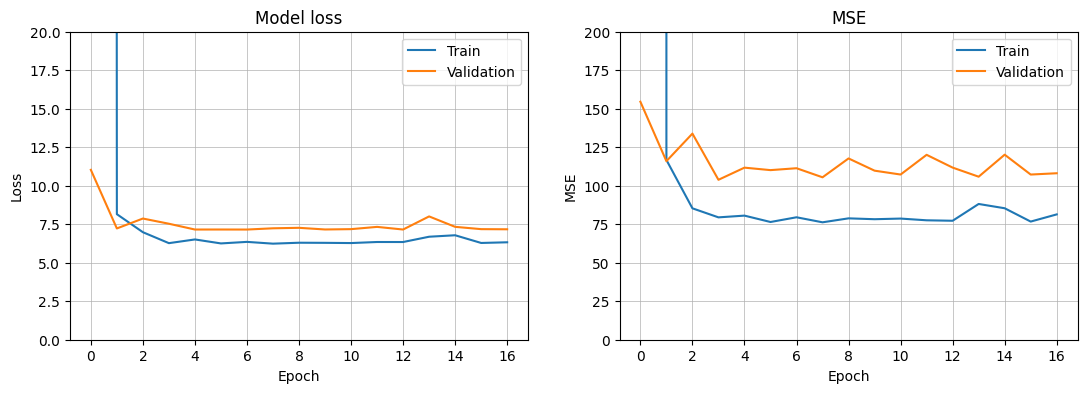

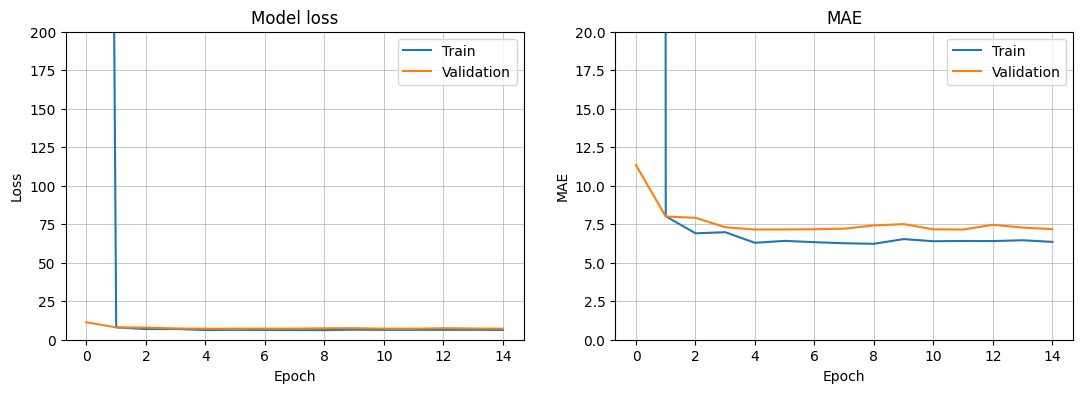

In [183]:
plot_loss_mse(history[0])
plot_loss_mae(history[1])

🤔 When you work on this regression task, you want to achieve the lowest MAE in the test set at the end, right? So why wouldn't we use it directly as a loss function that would decrease with respect to the number of epochs? 

<details>
    <summary>Answer</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameters are best suited to the MSE than to the MAE loss?

</details>

## (4)  Saving and loading a trained neural network

🤯 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new datapoint. Would you give this person your notebook for her/him to run it entirely and then predict the new datapoint? Hell no, we have a much better solution:
- 💾 Save the weights of the optimized neural network
- 🤝 Your friend/colleague/teammate/classmate can use them to predict a new datapoint

❓ **Question: training a good model** ❓

* Try to reach a MAE on the test set that is lower than 5 (_feel free to re-create the architecture and redefine your compiling parameters in this section!_)
    - _Remember: we are predicting house prices, so a mistake of less than 5_000 USD is already good in the real estate industry)_
    
* Whether you managed to reach it or not, move on to the question _"saving a model"_ after a few attempts.

In [186]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.1)
def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(10,activation='relu', input_dim=13))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer=opt, loss='mae', metrics=['mae'])
    return model


In [187]:
model = initialize_model()
es = EarlyStopping(patience=20, restore_best_weights=True)
model.fit(X_train_scaled,
          y_train,
          batch_size=32,
          epochs=1000,
          callbacks=[es],
          validation_split=0.3,
          verbose=0)

In [190]:
mae_test = model.evaluate(X_test_scaled, y_test)[1]

4/4 [==============================] - 0s 4ms/step - loss: 2.9875 - mae: 2.9875


In [191]:
from nbresult import ChallengeResult
result = ChallengeResult('solution',
    mae_test = mae_test)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/lewagoncassien/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/lewagoncassien/code/CassienB/data-finetune-your-neural-network/tests
plugins: asyncio-0.19.0, anyio-3.6.1
asyncio: mode=strict
collecting ... collected 1 item

test_solution.py::TestSolution::test_is_score_ok PASSED                  [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/solution.pickle

git commit -m 'Completed solution step'

git push origin master



📚 [**tf/keras/models/save_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

❓ **Question: saving a model** ❓  

Save your model using the `.save_model(model, 'name_of_my_model')` method

In [192]:
models.save_model(model, 'stonk_house_model')

# # and you can load it somewhere else:
# loaded_model = models.load_model('my_model')

INFO:tensorflow:Assets written to: stonk_house_model/assets


📚 [**tf/keras/models/load_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)

❓ **Question: Loading a model** ❓ 

* Load the model that you've just saved using `.load_model('name_of_your_model')` and store it into a variable called `loaded_model

* Evaluate it on the test data to check that it gives the same result as before.

In [193]:
loaded_model = models.load_model('stonk_house_model')

In [195]:
loaded_model.evaluate(X_test_scaled,y_test)[1]

4/4 [==============================] - 0s 3ms/step - loss: 2.9875 - mae: 2.9875


2.987480640411377

## (5) (Optional) Exponential Decay

❗️ Warning ❗️ 

* This section is optional and for advanced practitioners
* The next question is not essential and can be indeed skipped as many algorithms can be run without such optimization. 

🧑🏻‍🏫 Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need a large learning rate to learn fast, and as the neural network converges and gets closer to the minimum of the loss function, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question: the Exponential Decay Scheduler** ❓ 

* Use the 📚 [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 📚 in the `adam` optimizer
* Run it on the previous data. 

Start with the following:

```python
initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 5000, decay_rate = 0.7,
)
```

In [196]:
X_train.shape[0]*0.7/16

17.674999999999997

In [199]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(10,activation='relu', input_dim=13))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    return model

initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 5000, decay_rate = 0.7,)

opt = tensorflow.keras.optimizers.Adam(learning_rate=lr_schedule)



model = initialize_model()
model.compile(optimizer=opt,
              loss='mae',
              metrics=['mse'])

es = EarlyStopping(patience=20, restore_best_weights=True)

model.fit(X_train_scaled,
          y_train,
          batch_size=32,
          epochs=1000,
          callbacks=[es],
          validation_split=0.3,
          verbose=0)

In [200]:
model.evaluate(X_test_scaled,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2.6083 - mse: 16.6796


[2.608306884765625, 16.67964744567871]

🏁 Congratulations!

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge!